In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelBinarizer
from sklearn.model_selection import train_test_split


# TP N° 1: Análisis Exploratorio de Datos
## Heart Diseases Dataset
Este conjunto de datos es una versión avanzada del clásico conjunto de datos de enfermedades cardíacas de UCI Machine Learning, enriquecido con más características para soportar análisis más sofisticados.

Trabajaremos en el mismo con el fin de encontrar un modelo que sea capaz de predecir la severidad de la enfermedad cardíaca de un paciente en función de ciertas mediciones y atributos.

## 1- Listado de variables y selección 

In [5]:
data = pd.read_csv('./heart_disease_data_with_features.csv')

In [6]:
data.shape

(303, 36)

### **Dataset con las variables completas**

In [7]:
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,chol_trestbps_ratio,log_thalach_chol,symptom_zscore,avg_chol_by_age_group,thalach_chol_diff,symptom_severity_diff,age_chol_effect,thalach_risk_effect,age_trestbps_effect,chol_risk_ratio
0,63,1,1,145,233,1,2,150,0,2.3,...,1.595890,0.919704,-0.275764,260.024691,-83,-2.532099,14679,2419.350,9135,13.602662
1,67,1,4,160,286,0,2,108,1,1.5,...,1.776398,0.828936,0.568702,260.024691,-178,1.167901,19162,2242.296,10720,13.142174
2,67,1,4,120,229,0,2,129,1,2.6,...,1.892562,0.895083,1.572932,260.024691,-100,5.567901,15343,2134.047,8040,13.053640
3,37,1,3,130,250,0,0,187,0,3.5,...,1.908397,0.947695,1.595755,219.785714,-63,8.178571,9250,1972.850,4810,21.645022
4,41,0,2,130,204,0,2,172,0,1.4,...,1.557252,0.968116,-0.161647,235.847222,-32,0.783333,8364,1662.208,5330,19.129782
5,56,1,2,120,236,0,0,178,0,0.8,...,1.950413,0.948670,-0.435528,247.424000,-58,-2.034400,13216,2566.048,6720,15.308770
6,62,0,4,140,268,0,2,160,0,3.6,...,1.900709,0.908251,2.485868,260.024691,-108,9.567901,16616,2882.560,8680,14.093395
7,57,0,4,120,354,0,0,163,1,0.6,...,2.925620,0.868488,-0.252941,247.424000,-191,-1.234400,20178,3484.614,6840,15.819108
8,63,1,4,130,254,0,2,147,0,1.4,...,1.938931,0.901818,0.477408,260.024691,-107,0.767901,16002,2543.394,8190,13.878265
9,53,1,4,140,203,1,2,155,1,3.1,...,1.439716,0.949557,2.029400,247.424000,-48,8.765600,10759,1884.645,7420,15.426704


#### Descripción de las variables a utilizar:


- **sex**: Genero del paciente; 1 para hombre, 0 para mujer. (int).


- **cp**: se refiere al tipo de dolor en el pecho y es especialmente relevante en un contexto cardíaco, ya que el dolor en el pecho suele estar relacionado con el corazón. Esta clasificación es crucial para evaluar y diferenciar entre diferentes presentaciones clínicas que podrían indicar la presencia o ausencia de una condición cardíaca (int). 


- **fbs**: Azúcar en sangre en ayunas > 120 mg/dl. Puede indicar diabetes, un factor de riesgo significativo para enfermedades cardíacas; 1: verdadero, 0: falso (int).


- **restecg**: Resultado electrocardiográfico en reposo (int). Detecta irregularidades en el ritmo cardíaco y la función eléctrica del corazón, lo cual puede indicar problemas cardíacos; 0: Normal, 1: ST-T anomalía de las ondas, 2: Hipertrofia ventricular izquierda probable o definitiva.


- **thalach**: Frecuencia cardiaca máxima alcanzada (int). Es relevante porque ayuda a evaluar la respuesta del corazón al estrés físico y a detectar posibles anomalías cardíacas.


- **exang**: Angina inducida por el ejercicio. Indica un flujo sanguíneo insuficiente al corazón durante el esfuerzo, señal de enfermedad coronaria.; 1: si, 0: no (int).


- **oldpeak**: Depresión inducida por el ejercicio en relación al reposo. porque puede reflejar isquemia cardíaca, indicando un flujo sanguíneo reducido al corazón bajo estrés (float). 


- **slope**: Pendiente del segmento ST en el pico del ejercicio. Es importante porque puede indicar isquemia miocárdica, sugiriendo un mayor riesgo de enfermedad coronaria (int); 1: Ascendente, 2: Plano, 3: Descendente. 


- **ca**: Número de los vasos principales coloreados por fluoroscopia. Indica la extensión de la enfermedad coronaria, reflejando la cantidad de vasos afectados y la severidad de la obstrucción. (float).


- **thal**: Talasemia. Puede causar anemia crónica, lo que puede aumentar el riesgo de complicaciones cardíacas; 3: Normal, 6:Defecto fijo, 7: Defecto reversible (float). 


- **age_group**: Edad por categoría. Ayuda a ajustar el riesgo cardiovascular según diferentes grupos etarios, reflejando cómo el riesgo de enfermedad cardíaca cambia con la edad; '30s', '40s', '50s', '60s'.


- **cholesterol_level**: Nivel de colesterol por categoría. Clasifica el riesgo cardiovascular según los niveles de colesterol, facilitando la identificación de pacientes con mayor riesgo de enfermedades cardíacas; 'bajo', 'normal', 'alto'. 


- **bp_level**: Presión arterial por categoría. Clasifica el riesgo cardiovascular según los niveles de presión arterial, permitiendo una mejor evaluación y manejo de la hipertensión y sus riesgos asociados; 'bajo', 'normal', 'alto'. 


- **risk_score**: Riesgo calculado utilizando la siguiente fórmula: ({edad} * {chol} / 1000 + \{trestbps} / 100). 


- **symptom_severity**: Gravedad de los síntomas. Determinar la urgencia del tratamiento y la extensión de la enfermedad cardíaca; calculado como ({cp} *{oldpeak}). 


- risk_factor: Factor de riesgo calculado: ({cp} * {oldpeak} * {thal}).




### **Descripción de variable de salida:**

- **num**: Diagnóstico de enfermedades cardiacas (int); 

**Valores posibles:**


0: No se detecta enfermedad 

1-4: Enfermedad que se presenta con una gravedad creciente, es decir, cuanto más alto el valor, más gravedad de la enfermedad.




### Descripción de variables que no se usan y el por qué:

- age: Edad de los pacientes de los cuales se tiene registro (int). No se usa debido a que utilizaremos age_group.


- age_squared: al no utilizar la variable edad, no utilizamos el cuadrado de la edad.


- chol:  Nivel de colesterol en suero. Es importante porque a niveles altos pueden provocar arteriosclerosis, aumentando el riesgo de ataques cardíacos. (mg/dl) (int). Se utilizará cholesterol_level en su lugar.


- log_chol: Logaritmo del nivel de colesterol. No se usa debido a que, aunque el logaritmo del colesterol puede ser útil en análisis estadísticos, no proporciona información clínica directa.


- chol_trestbps_ratio: Relación entre el nivel de colesterol y el nivel de presión arterial en reposo. No la utilizamos porque es una variable derivada de otras dos, es decir, indirectamente dice lo mismo.


- log_thalach_chol: Logaritmo del producto de la frecuencia cardíaca máxima y el nivel de colesterol. No la utilizamos porque es una variable derivada de otras dos, es decir, indirectamente dice lo mismo.


- avg_chol_by_age_group: Promedio del nivel de colesterol para el grupo etario. No la utilizamos porque es una variable derivada de otras dos, además se encuentra repetida en muchos registros, dado que para cada grupo etario es el mismo valor en cada variable.


- thalach_chol_diff: Diferencia entre la frecuencia cardíaca máxima y el nivel de colesterol. No la utilizamos porque es una variable derivada de otras dos, es decir, indirectamente dice lo mismo.


- age_chol_effect: El producto de la edad y el nivel de colesterol. No la utilizamos porque es una variable derivada de otras dos que no se utilizan.


- chol_squared: Cuadrado del nivel de colesterol. Es importante porque en algunos análisis se usa para evaluar la relación no lineal entre los niveles de colesterol y el riesgo cardiovascular. AL ser útil solo en ocasiones, decidimos no utilizarlo.


- chol_risk_ratio: Relación entre el nivel de colesterol y la puntuación de riesgo. No se usa porque no es un indicador directo de enfermedad.


- trestbps: Presión arterial en reposo (mm Hg) (int). Se utilizará bp_level en su lugar.


- log_trestbps: Logaritmo de la presión arterial en reposo. No se usa por el mismo criterio de antes, el logaritmo de la presión arterial no es directamente útil para el diagnóstico.


- age_trestbps_effect: El producto de la edad y la presión arterial en reposo. Combina dos factores de riesgo cardiovascular, permitiendo una evaluación más completa del riesgo de enfermedades cardíacas basado en la edad y la presión arterial. No la utilizamos porque es una variable derivada de otras dos, es decir, indirectamente dice lo mismo.


- missing_values: Contador de valores faltantes en ‘ca’ y ‘thal’. No es una variable útil porque con el tratamiento de datos se llenan los valores faltantes.


- symptom_zscore: Puntuación Z de la gravedad de los síntomas. No se usa porque es un análisis estadístico que no consideramos relevante para el diagnóstico clínico.


- age_thalach_ratio: Relación entre la frecuencia cardiaca máxima y la edad (más 1 para evitar la división por 0). No se usa dado que utilizamos el grupo etario y no la edad.


- symptom_severity_diff: Diferencia en la gravedad de los síntomas en comparación con el promedio del grupo de edad. No la utilizamos porque es una variable derivada de otras dos, es decir, indirectamente dice lo mismo.


- thalach_risk_effect: El producto de la frecuencia cardíaca máxima y la puntuación de riesgo. No la utilizamos porque es una variable derivada de otras dos, es decir, indirectamente dice lo mismo.

### Procedemos a quedarnos con los datos a trabajar:

In [8]:
subset = data.loc[:, ['sex','cp','fbs','restecg','thalach', 'exang','oldpeak','slope', 'ca','thal', 'num','age_group', 'cholesterol_level', 'bp_level','risk_score', 'symptom_severity', 'risk_factor']]
subset.describe()

,sex,cp,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,risk_score,symptom_severity,risk_factor
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000,303.000000,303.000000,301.000000
mean,0.679868,3.158416,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294,14.844073,3.508251,19.733887
std,0.467299,0.960126,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536,4.073047,4.381467,28.421998
min,0.000000,1.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,7.216000,0.000000,0.000000
25%,0.000000,3.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,12.080000,0.000000,0.000000
50%,1.000000,3.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000,14.392000,1.800000,7.200000
75%,1.000000,4.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000,17.181000,5.500000,28.800000
max,1.000000,4.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000,38.938000,24.800000,173.600000


Para refrescar, mostramos los tipos de datos de las variables utilizadas:

In [9]:
subset.dtypes

sex                    int64
cp                     int64
fbs                    int64
restecg                int64
thalach                int64
exang                  int64
oldpeak              float64
slope                  int64
ca                   float64
thal                 float64
num                    int64
age_group             object
cholesterol_level     object
bp_level              object
risk_score           float64
symptom_severity     float64
risk_factor          float64
dtype: object

Ejemplo del subset con las variables de interés:

In [10]:
subset.head(10)

,sex,cp,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,age_group,cholesterol_level,bp_level,risk_score,symptom_severity,risk_factor
0,1,1,1,2,150,0,2.3,3,0.0,6.0,0,60s,normal,high,16.129,2.3,13.8
1,1,4,0,2,108,1,1.5,2,3.0,3.0,2,60s,high,high,20.762,6.0,18.0
2,1,4,0,2,129,1,2.6,2,2.0,7.0,1,60s,normal,low,16.543,10.4,72.8
3,1,3,0,0,187,0,3.5,3,0.0,3.0,0,30s,high,normal,10.550,10.5,31.5
4,0,2,0,2,172,0,1.4,1,0.0,3.0,0,40s,normal,normal,9.664,2.8,8.4
5,1,2,0,0,178,0,0.8,1,0.0,3.0,0,50s,normal,low,14.416,1.6,4.8
6,0,4,0,2,160,0,3.6,3,2.0,3.0,3,60s,high,normal,18.016,14.4,43.2
7,0,4,0,0,163,1,0.6,1,0.0,3.0,0,50s,high,low,21.378,2.4,7.2
8,1,4,0,2,147,0,1.4,2,1.0,7.0,2,60s,high,normal,17.302,5.6,39.2
9,1,4,1,2,155,1,3.1,3,0.0,7.0,1,50s,normal,normal,12.159,12.4,86.8


## 2- Análisis detallado del conjunto de variables

### Valores Nulos
Estos son los valores nulos encontrados en el subset de datos:

In [11]:
subset.isnull().sum()

sex                  0
cp                   0
fbs                  0
restecg              0
thalach              0
exang                0
oldpeak              0
slope                0
ca                   4
thal                 2
num                  0
age_group            1
cholesterol_level    1
bp_level             2
risk_score           0
symptom_severity     0
risk_factor          2
dtype: int64

#### Tratamiento de valores nulos

**Variables:**
- **ca: numerica**
- **thal: numerica**
- **age_group: cualitativa**
- **cholesterol_level: cualitativa**
- **bp_level: cualitativa**
- **risk_factor: numerica**

Para las variables numericas, el tratamiento que llevaremos a cabo sera rellenar con la media
Para las variables cualitativas, el tratamiento será rellenar con el valor que mas se repite

#### tratamiento de valores nulos de 'ca'

In [12]:
subset['ca'] = subset['ca'].fillna(subset['ca'].mean())
subset['ca'].isnull().sum()

0

#### tratamiento de valores nulos de 'thal'

In [13]:
subset[subset['thal'].isna()]

,sex,cp,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,age_group,cholesterol_level,bp_level,risk_score,symptom_severity,risk_factor
87,0,3,0,2,115,0,0.0,1,0.0,NaN,0,50s,normal,normal,12.728,0.0,NaN
266,1,4,1,0,156,1,1.0,2,0.0,NaN,2,50s,normal,normal,11.888,4.0,NaN


In [14]:
subset['thal'] = subset['thal'].fillna(subset['thal'].mean())
subset['thal'].isnull().sum()

0

#### tratamiento de valores nulos de 'age_group'

In [15]:
subset['age_group'] = subset['age_group'].fillna(subset['age_group'].mode()[0])
subset['age_group'].isnull().sum()

0

#### tratamiento de valores nulos de 'cholesterol level'

In [16]:
subset['cholesterol_level'] = subset['cholesterol_level'].fillna(subset['cholesterol_level'].mode()[0])
subset['cholesterol_level'].isnull().sum()

0

#### tratamiento de valores nulos de 'bp_level'

In [17]:
subset['bp_level'] = subset['bp_level'].fillna(subset['bp_level'].mode()[0])
subset['bp_level'].isnull().sum()

0

#### tratamiento de valores nulos de 'risk_factor'

In [18]:
subset['risk_factor'] = subset['risk_factor'].fillna(subset['risk_factor'].mean())
subset['risk_factor'].isnull().sum()

0

### Análisis de la variable de salida
**Diagnosis - Diagnóstico** 

<Axes: title={'center': 'num'}, xlabel='num'>

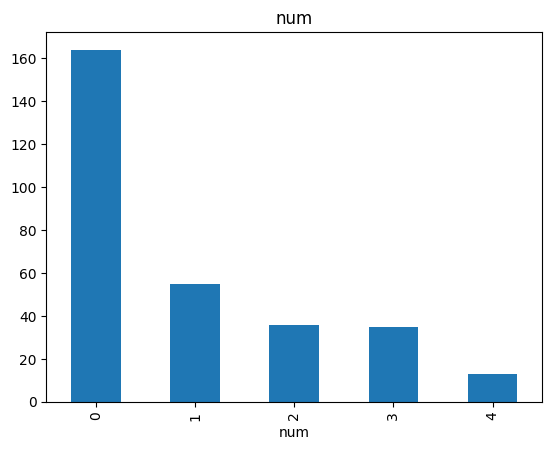

In [19]:
subset.num.value_counts().plot.bar(title='num')

In [20]:
subset.num.value_counts()

num
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64

In [21]:
len(subset)

303

Podemos observar en el grafico que de la variable **num** se encuentra dividida en los siguientes porcentajes:
- **0 - 55,21%**
- **1 - 18.51%**
- **2 - 11.78%**
- **3 - 11.78%**
- **4 - 4.37%**

Esto nos indica que el 55% de las personas no se detectaron enfermedades cardiacas, y el resto, el 45% indica que hay enfermedad cardiaca entre sus diferentes gravedades. Esto nos muestra que hay una tendencia en la cual mientras más grave sea la enfermedad cardiaca, menor es la cantidad de personas hay.

In [22]:
mean = subset['num'].mean()

std_dev = subset['num'].std()

print(f"Media: {mean}")
print(f"Desviación estándar: {std_dev}")

Media: 0.9372937293729373
Desviación estándar: 1.2285356879701044


Interpretación de la Media: Es 0.9337, lo que indica que el valor promedio de la variable es cercano a 1. Esto sugiere que la mayoría de los datos están en los valores más bajos (0 y 1), con algunos valores más altos contribuyendo a elevarla ligeramente.

Interpretación de la Desviación Estándar: Es 1.229, lo que nos indica cuánto se desvían los datos de la media, en promedio. Es relativamente alta en comparación con la media, lo que sugiere que hay una considerable variabilidad en los datos con una distribución sesgada hacia los valores más bajos (cercanos a 0). Esto es consistente con una distribución en la que hay pocos datos con valores altos (3 o 4), lo cual tiene sentido, dado que es más complejo tener mayor cantidad de registros de pacientes con mayor gravedad.


Creemos que la alta desviación estándar en comparación con la media y el sesgo hacia valores bajos en los datos pueden afectar negativamente el rendimiento del modelo de machine learning. AL existir desbalance en las clases, se diiculta el aprendizaje del modelo para predecir correctamente los valores menos frecuentes, es decir, creemos que la confiabilidad de las predicciones de nuestro modelo no van a ser buenas.

### Análisis de las variables de entrada

Para mayor compresnión, decidimos renombrar las variables.

In [23]:
BETTER_COLUMN_NAMES = {
    'sex': 'sex',
    'cp': 'chest_pain',
    'fbs':'fasting_blood_sugar',
    'restecg':'rest_ecg',
    'thalach':'max_heart_rate',
    'exang':'exercise_induced_angina',
    'oldpeak':'depression_induced_ex',
    'slope':'slope',
    'ca':'vessels_colored_fl',
    'thal':'thalassemia',
    'num':'diagnosis',
    'age_group':'age_group',
    'cholesterol_level':'cholesterol_level',
    'bp_level':'blood_pressure_level',
    'risk_score':'risk_score',
    'symptom_severity':'symptom_severity',
    'risk_factor':'risk_factor'
}

subset.rename(columns=BETTER_COLUMN_NAMES, inplace=True)

subset

,sex,chest_pain,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,depression_induced_ex,slope,vessels_colored_fl,thalassemia,diagnosis,age_group,cholesterol_level,blood_pressure_level,risk_score,symptom_severity,risk_factor
0,1,1,1,2,150,0,2.3,3,0.000000,6.0,0,60s,normal,high,16.129,2.3,13.8
1,1,4,0,2,108,1,1.5,2,3.000000,3.0,2,60s,high,high,20.762,6.0,18.0
2,1,4,0,2,129,1,2.6,2,2.000000,7.0,1,60s,normal,low,16.543,10.4,72.8
3,1,3,0,0,187,0,3.5,3,0.000000,3.0,0,30s,high,normal,10.550,10.5,31.5
4,0,2,0,2,172,0,1.4,1,0.000000,3.0,0,40s,normal,normal,9.664,2.8,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,1,1,0,0,132,0,1.2,2,0.000000,7.0,1,40s,high,low,12.980,1.2,8.4
299,1,4,1,0,141,0,3.4,2,2.000000,7.0,2,60s,low,high,14.564,13.6,95.2
300,1,4,0,0,115,1,1.2,2,1.000000,7.0,3,50s,low,normal,8.767,4.8,33.6
301,0,2,0,2,174,0,0.0,2,1.000000,3.0,1,50s,normal,normal,14.752,0.0,0.0


Para facilitar la comprensión de las proporciones de las variables en estudio en función de diagnosis, realizamos una funcion que nos permite obtener las mismas.

In [24]:
def calcular_proporcion_por_valor(df, variable1, valor1, variable2, valor2):
    filtro = (df[variable1] == valor1) & (df[variable2] == valor2)
    conteo_filtro = df[filtro].shape[0]

    proporcion = conteo_filtro / df[variable2].value_counts()[valor2]
    
    return proporcion

def mostrar_total_propociones(variable1, variable2):
    proporciones = {}
    valores_diagnosis = subset[variable1].unique()
    valores_vessels_colored_fl = subset[variable2].unique()

    for valor_diagnosis in valores_diagnosis:
        for valor_vessels in valores_vessels_colored_fl:
            proporcion = calcular_proporcion_por_valor(subset, variable1, valor_diagnosis, variable2, valor_vessels)
            proporciones[(valor_diagnosis, valor_vessels)] = proporcion

    proporciones_df = pd.DataFrame(list(proporciones.items()), columns=['Combinación', 'Proporción'])
    proporciones_df[variable2] = proporciones_df['Combinación'].apply(lambda x: x[1])
    proporciones_df[variable1] = proporciones_df['Combinación'].apply(lambda x: x[0])
    proporciones_df = proporciones_df.drop(columns=['Combinación'])

    print(proporciones_df.sort_values(by=[variable2, variable1]))  

### **sex**

In [25]:
subset.sex.value_counts()

sex
1    206
0     97
Name: count, dtype: int64

<Axes: title={'center': 'Sex (1: Hombre 0: Mujer)'}, xlabel='sex'>

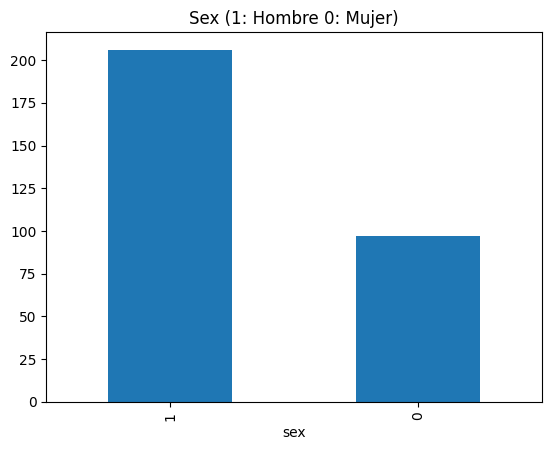

In [26]:
subset.sex.value_counts().plot.bar(title='Sex (1: Hombre 0: Mujer)')

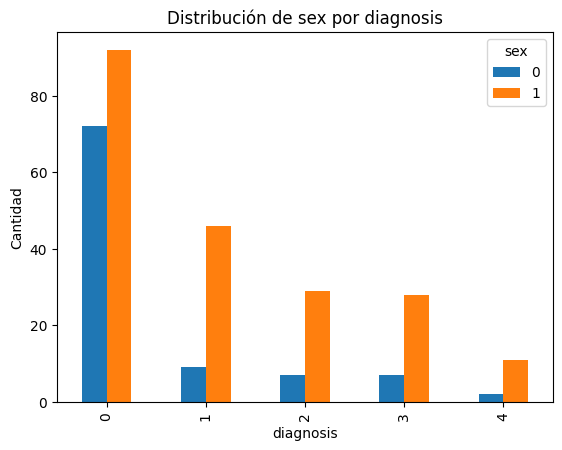

In [27]:
grouped_data = subset.groupby(['diagnosis', 'sex']).size().unstack(fill_value=0)
grouped_data.plot(kind='bar', title='Distribución de sex por diagnosis')

plt.xlabel('diagnosis')
plt.ylabel('Cantidad')
plt.show()

Los registros de sex se encuentra desbalaceados, siendo la cantidad de hombres en los registros de un 69.02% y de las mujeres el 32.65%, por lo que es evidente que en el gráfico indique una predominancia de hombres en todos los niveles de severidad.

Para realizar un mejor análisis, sacamos la porporción de los resultados con respecto a la variable de salida:

In [28]:
mostrar_total_propociones('diagnosis', 'sex')

   Proporción  sex  diagnosis
1    0.742268    0          0
5    0.092784    0          1
3    0.072165    0          2
7    0.072165    0          3
9    0.020619    0          4
0    0.446602    1          0
4    0.223301    1          1
2    0.140777    1          2
6    0.135922    1          3
8    0.053398    1          4


Entre las mujeres, la mayoría (74%) no presenta enfermedad cardíaca y la proporción disminuye considerablemente para diagnósticos más graves (2% en la más grave).
Entre los hombres, también hay una alta proporción sin enfermedad cardíaca (45%), pero la distribución es más equitativa entre las diferentes categorías de severidad comparado con las mujeres.
Esto sugiere que, en el grupo representado, tanto hombres como mujeres tienen una alta proporción sin enfermedad cardíaca, pero los hombres tienen una mayor proporción en las categorías de diagnóstico más severas en comparación con las mujeres.

### **Depression_induced_ex**

In [29]:
fig = px.box(subset, y='depression_induced_ex')
fig.show()

La variable representa la depresión inducida por el ejercicio en relación al reposo, lo que quiere decir que cuanto mas cercano a 0 es mejor, dado que un corazón saludable no debería esforzarse demasiado para hacer ejercicio.

Podemos observar en el gráfico que, el 50% de los datos se encuentran entre 0 y 1,6. A su vez, observamos que hay 4 registros con valores aberrantes, los cuales contemplaremos, dado que debemos analizar qué tan grave es la enfermedad cardíaca de un paciente, y estos casos aislados pueden darle información relevante al modelo.

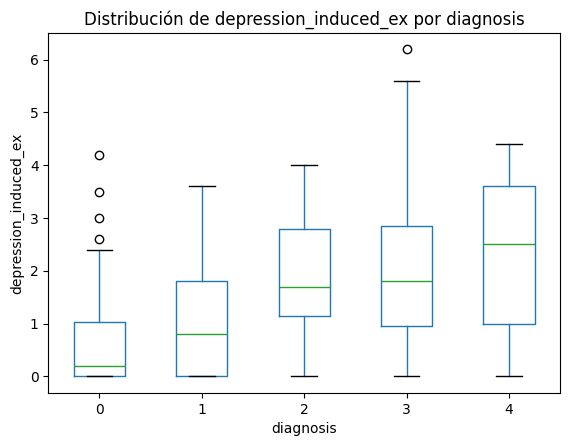

In [30]:
subset.boxplot(column='depression_induced_ex', by='diagnosis', grid=False)

plt.title('Distribución de depression_induced_ex por diagnosis')
plt.suptitle('')  
plt.xlabel('diagnosis')
plt.ylabel('depression_induced_ex')
plt.show() 

Las estadísticas muestran que la depresión inducida por el ejercicio aumenta a medida que el grupo de diagnóstico sube de 0 a 4. Los grupos con diagnósticos más altos (3 y 4) tienen valores promedio y desviaciones estándar más altos, indicando una mayor intensidad y variabilidad de la depresión inducida. En contraste, los grupos con diagnósticos más bajos (0 y 1) muestran menor intensidad y dispersión. Por lo tanto, hay una relación directamente proporcional entre el diagnóstico y la depresión inducida, con mayor severidad y variabilidad en los diagnósticos más altos.

### **Grupo Etáreo**

<Axes: title={'center': 'Grupo etario'}, xlabel='age_group'>

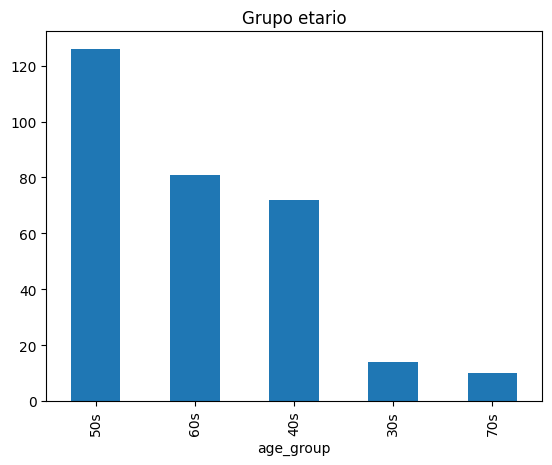

In [31]:
subset.age_group.value_counts().plot.bar(title='Grupo etario', )

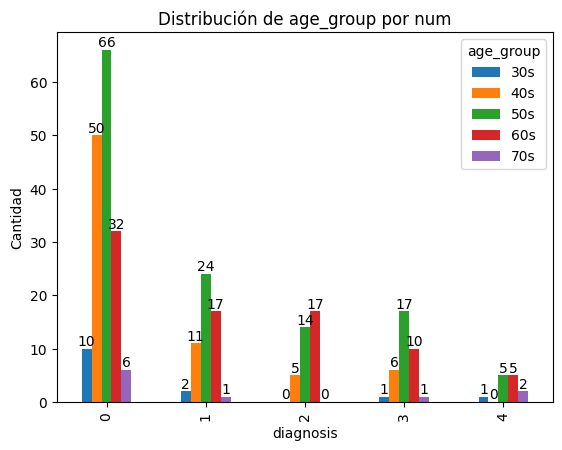

In [32]:
grouped_data = subset.groupby(['diagnosis', 'age_group']).size().unstack(fill_value=0)
graph = grouped_data.plot(kind='bar', title='Distribución de age_group por num')

for container in graph.containers:
    graph.bar_label(container, label_type='edge')

plt.xlabel('diagnosis')
plt.ylabel('Cantidad')
plt.show()

In [33]:
subset.age_group.value_counts()

age_group
50s    126
60s     81
40s     72
30s     14
70s     10
Name: count, dtype: int64

A simple vista observamos que el grupo etáreo de los **50s** es aquel que más destaca entre los diferentes valores de diagnosis, al igual que aquel grupo que se encuentra entre los **60s**.

**Porcentajes**
- **30s - 4.71%**
- **40s - 24.24%**
- **50s - 41.07%**
- **60s - 26.59%**
- **70s - 3.36%**

Con estos porcentajes observamos que los registros de las edades etarias se encuentra desbalanceados, siendo el grupo etáreo de 50s con el mayor porcentaje. 

Para hacer un análisis más profundo, sacamos la proporción de cada grupo etáreo en funcion con la gravedad de la enfermedad:


In [34]:
mostrar_total_propociones('diagnosis', 'age_group')

    Proporción age_group  diagnosis
1     0.714286       30s          0
11    0.142857       30s          1
6     0.000000       30s          2
16    0.071429       30s          3
21    0.071429       30s          4
2     0.694444       40s          0
12    0.152778       40s          1
7     0.069444       40s          2
17    0.083333       40s          3
22    0.000000       40s          4
3     0.523810       50s          0
13    0.190476       50s          1
8     0.111111       50s          2
18    0.134921       50s          3
23    0.039683       50s          4
0     0.395062       60s          0
10    0.209877       60s          1
5     0.209877       60s          2
15    0.123457       60s          3
20    0.061728       60s          4
4     0.600000       70s          0
14    0.100000       70s          1
9     0.000000       70s          2
19    0.100000       70s          3
24    0.200000       70s          4


La distribución muestra que la gravedad de la enfermedad aumenta con la edad, especialmente a partir de los 50 años, donde se observa un mayor porcentaje de casos en niveles de gravedad moderada y severa. Los grupos más jóvenes (30s y 40s) presentan una mayoría de casos leves o sin enfermedad, mientras que en los grupos mayores (60s y 70s) se ve una mayor dispersión, con algunos individuos en niveles graves, especialmente en los 70s, donde un 20% alcanza el nivel más alto de severidad. Esto sugiere una relación clara entre la edad y la progresión de la enfermedad.

#### **CP - Tipo de dolor de pecho**

Es especialmente relevante en un contexto cardíaco, ya que el dolor en el pecho suele estar relacionado con el corazón. Esta clasificación es crucial para evaluar y diferenciar entre diferentes presentaciones clínicas que podrían indicar la presencia o ausencia de una condición cardíaca. 

Valores que puede tomar:

- 1: Angina típica -- suele estar relacionada con problemas coronarios significativos, por lo que es grave.

- 2: Angina atípica -- puede retrasar el tratamiento dado que es díficl de analizar, aunque en algunos casos puede no ser tan grave como la angina típica.

- 3: Dolor no anginal -- este tipo de dolor no suele estar relacionado con el corazón, lo que lo hace menos grave desde el punto de vista cardíaco.

- 4: Asintomático -- al no haber dolor ni otras señales de advertencia, el problema puede pasar desapercibido y no tratarse a tiempo, lo que aumenta el riesgo de complicaciones como infartos en pacientes que estan enfermos. Pero también aquellos que estén sanos entran en esta categoría.

Según lo investigado, el asíntomatico puede ser bueno o muy grave, dado que no asegura que una persona no está enferma, ya que puede desarrollarse una enfermedad cardíaca sin presentar síntomas. 

La pregunta que haríamos es: ¿cómo tomamos los registros asintomáticos, cómo algo bueno o malo? Es decir, ¿cuánto mayor es el valor de estos resultados, menos probabilidades de tener una enfermedad grave? ¿O están desordenados?

<Axes: title={'center': 'Tipo de dolor de pecho'}, xlabel='chest_pain'>

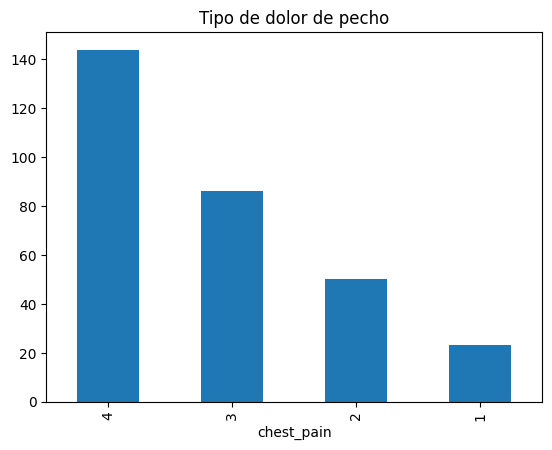

In [35]:
subset.chest_pain.value_counts().plot.bar(title='Tipo de dolor de pecho')

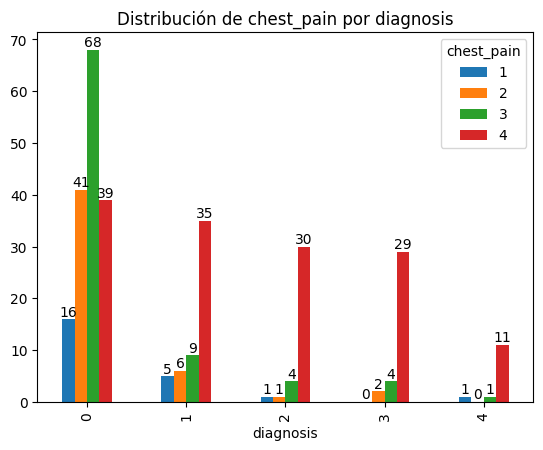

In [36]:
grouped_data = subset.groupby(['diagnosis', 'chest_pain']).size().unstack(fill_value=0)
graph = grouped_data.plot(kind='bar', title='Distribución de chest_pain por diagnosis')

for container in graph.containers:
    graph.bar_label(container, label_type='edge')

In [37]:
subset.chest_pain.value_counts()

chest_pain
4    144
3     86
2     50
1     23
Name: count, dtype: int64

Se puede observar el tipo de dolor de pecho es una variable relevante para determinar la gravedad de la enfermedad cardíaca. 

Pero, también se ve en el gráfico que aquellos pacientes asintomáticos (4) se encuentran distribuidos uniformemente entre todas las variables del diagnosis por lo cual, creemos que distorisionará las predicciones del modelo dado que hay tanto casos de reigstros asintomáticos que no presentan ninguna gravedad, como también hay casos que presentan las diferentes gravedades. 

**Porcentaje de chest_pain**
- **4 - 46.80%**
- **3 - 28.95%**
- **2 - 16.83%**
- **1 - 7.40%**

In [38]:
mostrar_total_propociones('diagnosis', 'chest_pain')

    Proporción  chest_pain  diagnosis
0     0.695652           1          0
8     0.217391           1          1
4     0.043478           1          2
12    0.000000           1          3
16    0.043478           1          4
3     0.820000           2          0
11    0.120000           2          1
7     0.020000           2          2
15    0.040000           2          3
19    0.000000           2          4
2     0.790698           3          0
10    0.104651           3          1
6     0.046512           3          2
14    0.046512           3          3
18    0.011628           3          4
1     0.270833           4          0
9     0.243056           4          1
5     0.208333           4          2
13    0.201389           4          3
17    0.076389           4          4


### **FBS - Azúcar en sangre en ayunas > 120 mg/dl**

<Axes: title={'center': 'Azúcar en sangre > 120ml/dl'}, xlabel='fasting_blood_sugar'>

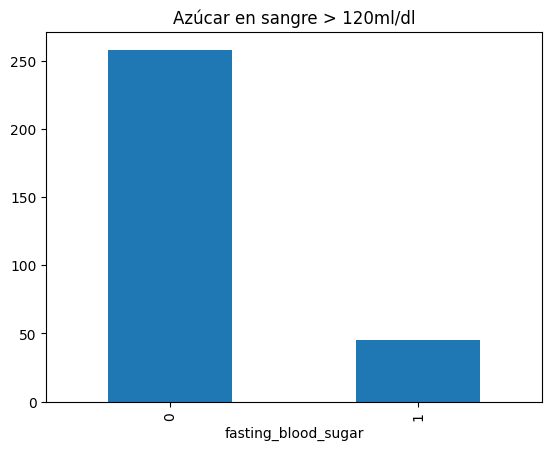

In [39]:
subset.fasting_blood_sugar.value_counts().plot.bar(title='Azúcar en sangre > 120ml/dl')

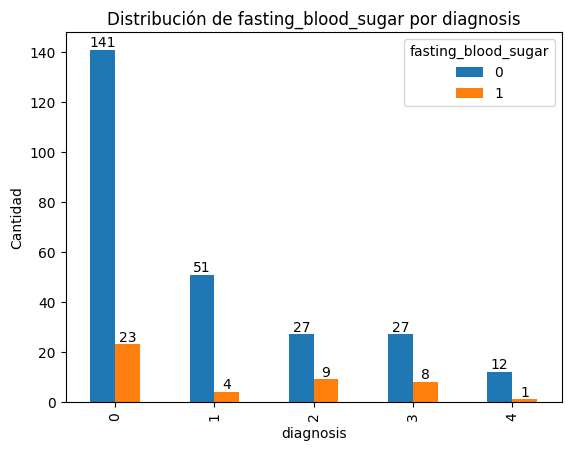

In [40]:
grouped_data = subset.groupby(['diagnosis', 'fasting_blood_sugar']).size().unstack(fill_value=0)
graph = grouped_data.plot(kind='bar', title='Distribución de fasting_blood_sugar por diagnosis')

for container in graph.containers:
    graph.bar_label(container, label_type='edge')

plt.xlabel('diagnosis')
plt.ylabel('Cantidad')
plt.show()

In [41]:
subset.fasting_blood_sugar.value_counts()

fasting_blood_sugar
0    258
1     45
Name: count, dtype: int64

Valores de fasting_blood_sugar
- 0: No supera de 120 mg/dl de azúcar en sangre.
- 1: Supera de 120 mg/dl de azúcar en sangre.

In [42]:
mostrar_total_propociones('diagnosis', 'fasting_blood_sugar')


   Proporción  fasting_blood_sugar  diagnosis
1    0.546512                    0          0
5    0.197674                    0          1
3    0.104651                    0          2
7    0.104651                    0          3
9    0.046512                    0          4
0    0.511111                    1          0
4    0.088889                    1          1
2    0.200000                    1          2
6    0.177778                    1          3
8    0.022222                    1          4


El grupo con fasting_blood_sugar mayor de 120 mg/dl tiende a tener una mayor proporción de casos con diagnosis 2 y 3, lo que sugiere que altos niveles de azúcar en sangre están correlacionados con una mayor gravedad de la enfermedad cardíaca, aunque no necesariamente en los casos más críticos (diagnosis 4). Esto respalda la relación conocida entre la hiperglucemia y el riesgo de complicaciones cardíacas.

### **restecg - Resultado electrocardiográfico en reposo**

<Axes: title={'center': 'rest_ecg'}, xlabel='rest_ecg'>

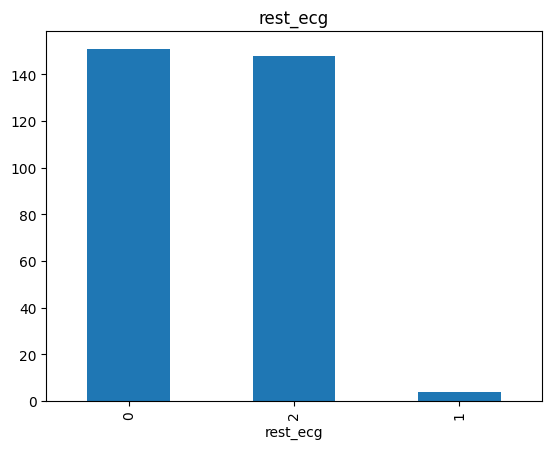

In [43]:
subset.rest_ecg.value_counts().plot.bar(title='rest_ecg')

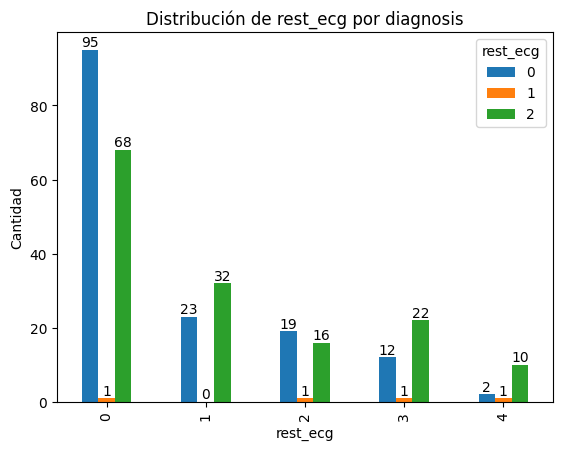

In [44]:
grouped_data = subset.groupby(['diagnosis', 'rest_ecg']).size().unstack(fill_value=0)
graph = grouped_data.plot(kind='bar', title='Distribución de rest_ecg por diagnosis')

for container in graph.containers:
    graph.bar_label(container, label_type='edge')

plt.xlabel('rest_ecg')
plt.ylabel('Cantidad')
plt.show()

In [45]:
mostrar_total_propociones('diagnosis', 'rest_ecg')


    Proporción  rest_ecg  diagnosis
1     0.629139         0          0
7     0.152318         0          1
4     0.125828         0          2
10    0.079470         0          3
13    0.013245         0          4
2     0.250000         1          0
8     0.000000         1          1
5     0.250000         1          2
11    0.250000         1          3
14    0.250000         1          4
0     0.459459         2          0
6     0.216216         2          1
3     0.108108         2          2
9     0.148649         2          3
12    0.067568         2          4


**Valores**

- 0 (Normal): Sin problemas evidentes.
- 1 (ST-T anomalía): Podría indicar problemas de oxigenación del corazón o daño en el músculo cardíaco.
- 2 (Hipertrofia ventricular izquierda): Señala un posible agrandamiento del ventrículo izquierdo, generalmente relacionado con presión arterial alta y asociado a mayor riesgo de enfermedad cardíaca.

En resumen, los resultados electrocardiográficos en reposo parecen estar asociados con la severidad de la enfermedad cardíaca de manera variable. Un electrocardiograma normal se asocia predominantemente con la ausencia de enfermedad, mientras que resultados que muestran hipertrofia ventricular o anomalías en ST-T están más uniformemente distribuidos entre las diferentes severidades de la enfermedad, sugiriendo una relación más compleja entre los resultados en reposo y la severidad de la enfermedad cardíaca.

### **exang - angina inducida por el ejercicio**

 Indica un flujo sanguíneo insuficiente al corazón durante el esfuerzo, señal de enfermedad coronaria.; 1: si, 0: no.

<Axes: title={'center': 'exang'}, xlabel='exercise_induced_angina'>

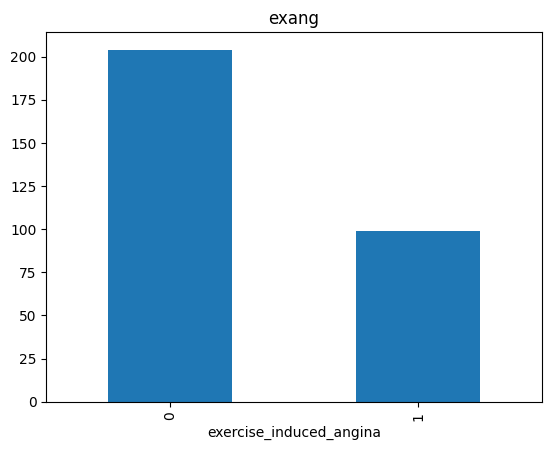

In [46]:
subset.exercise_induced_angina.value_counts().plot.bar(title='exang')

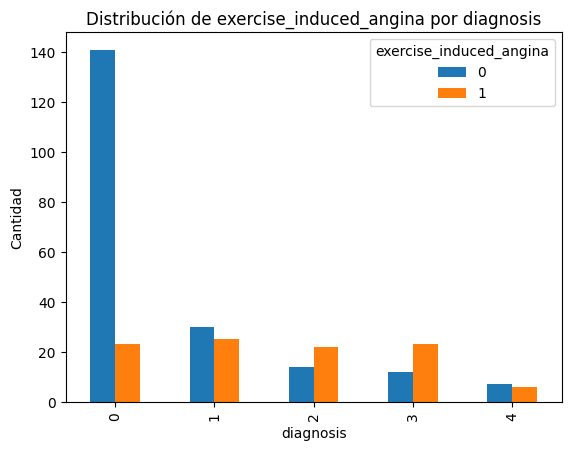

In [47]:
grouped_data = subset.groupby(['diagnosis', 'exercise_induced_angina']).size().unstack(fill_value=0)
grapf = grouped_data.plot(kind='bar', title='Distribución de exercise_induced_angina por diagnosis')

for container in graph.containers:
    graph.bar_label(container, label_type='edge')

plt.xlabel('diagnosis')
plt.ylabel('Cantidad')
plt.show()

In [48]:
mostrar_total_propociones('diagnosis', 'exercise_induced_angina')

   Proporción  exercise_induced_angina  diagnosis
0    0.691176                        0          0
4    0.147059                        0          1
2    0.068627                        0          2
6    0.058824                        0          3
8    0.034314                        0          4
1    0.232323                        1          0
5    0.252525                        1          1
3    0.222222                        1          2
7    0.232323                        1          3
9    0.060606                        1          4


Los datos muestran que la presencia de angina inducida por ejercicio está asociada con una gama más amplia de severidad en la enfermedad cardíaca, ya que los pacientes con flujo sanguíneo insuficiente durante el ejercicio tienen una distribución variada entre diferentes niveles de severidad. En contraste, aquellos sin angina inducida por ejercicio tienden a concentrarse en los niveles menos severos de la enfermedad, lo que indica que la angina inducida puede estar relacionada con una mayor severidad de la enfermedad cardíaca.

### **slope**

Es la pendiente del segmento ST en el pico de ejercicio. Si es ascendente (valor 1) es el valor menos procupante a la hora de tener que indicar alguna enfermedad cardiaca, por lo contrario, el valor 3 si es preocupante porque indica que la pendiente es descendente, y el valor 2 es plano, lo cual es ligeramente preocupante.

<Axes: title={'center': 'slope'}, xlabel='slope'>

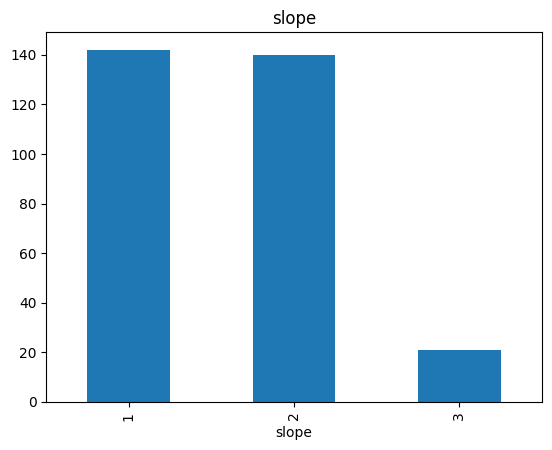

In [49]:
subset.slope.value_counts().plot.bar(title='slope')

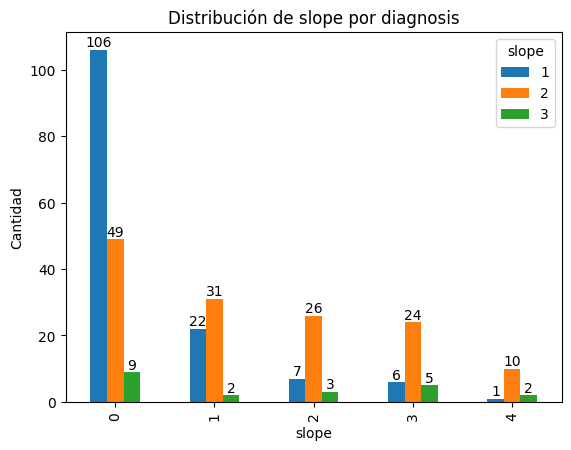

In [50]:
grouped_data = subset.groupby(['diagnosis', 'slope']).size().unstack(fill_value=0)
graph = grouped_data.plot(kind='bar', title='Distribución de slope por diagnosis')

for container in graph.containers:
    graph.bar_label(container, label_type='edge')

plt.xlabel('slope')
plt.ylabel('Cantidad')
plt.show()

In [51]:
mostrar_total_propociones('diagnosis', 'slope')

    Proporción  slope  diagnosis
2     0.746479      1          0
8     0.154930      1          1
5     0.049296      1          2
11    0.042254      1          3
14    0.007042      1          4
1     0.350000      2          0
7     0.221429      2          1
4     0.185714      2          2
10    0.171429      2          3
13    0.071429      2          4
0     0.428571      3          0
6     0.095238      3          1
3     0.142857      3          2
9     0.238095      3          3
12    0.095238      3          4


Los datos muestran que una pendiente normal del segmento ST (slope = 1) en el ejercicio se asocia con niveles menos severos de enfermedad cardíaca, mientras que una pendiente preocupante (slope = 3) está vinculada a una mayor severidad de la enfermedad. Una pendiente incierta (slope = 2) tiene una distribución más variada entre los diagnósticos.

#### Vessels colored fl

In [52]:
subset.vessels_colored_fl.sample(10)

18     0.0
55     1.0
130    0.0
237    0.0
158    2.0
143    0.0
81     0.0
60     0.0
163    0.0
248    2.0
Name: vessels_colored_fl, dtype: float64

Aca tenemos un problema, el tipo de variable de 'vessels_colored_fl' es float, pero los datos adentro son todos enteros, asi que seran transformados en int.

In [53]:
subset['vessels_colored_fl'] = subset['vessels_colored_fl'].astype(int)

<Axes: xlabel='vessels_colored_fl'>

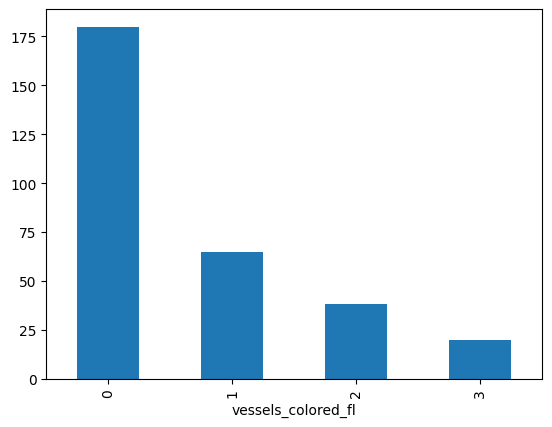

In [54]:
subset.vessels_colored_fl.value_counts().plot.bar()

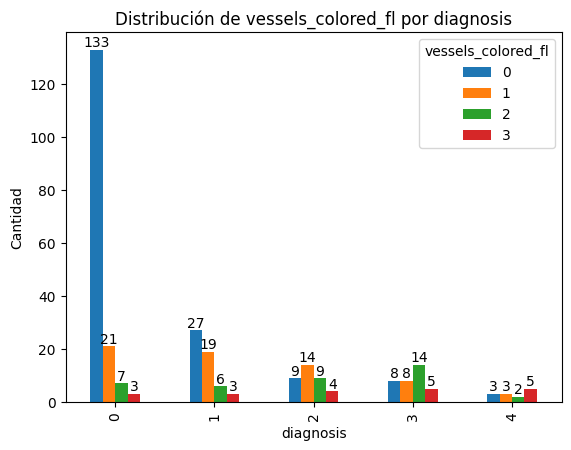

In [55]:
grouped_data = subset.groupby(['diagnosis', 'vessels_colored_fl']).size().unstack(fill_value=0)
graph = grouped_data.plot(kind='bar', title='Distribución de vessels_colored_fl por diagnosis')

for container in graph.containers:
    graph.bar_label(container, label_type='edge')

plt.xlabel('diagnosis')
plt.ylabel('Cantidad')
plt.show()


In [56]:
mostrar_total_propociones('diagnosis', 'vessels_colored_fl')

    Proporción  vessels_colored_fl  diagnosis
0     0.738889                   0          0
8     0.150000                   0          1
4     0.050000                   0          2
12    0.044444                   0          3
16    0.016667                   0          4
3     0.323077                   1          0
11    0.292308                   1          1
7     0.215385                   1          2
15    0.123077                   1          3
19    0.046154                   1          4
2     0.184211                   2          0
10    0.157895                   2          1
6     0.236842                   2          2
14    0.368421                   2          3
18    0.052632                   2          4
1     0.150000                   3          0
9     0.150000                   3          1
5     0.200000                   3          2
13    0.250000                   3          3
17    0.250000                   3          4


Es el número de vasos principales coloreados por fluroscopia, reflejando la cantidad de vasos afectados y la severidad de la obstruccion. Como podemos ver, aquellos que no poseen enfermedad cardiaca, son aquellos que no poseen vasos principales bloqueados.

Para aclarar, la escala de 0 a 4 generalmente tiene el siguiente significado:

0: No hay vasos principales afectados; es decir, no se observa enfermedad coronaria significativa. 1: Un vaso principal está afectado. 2: Dos vasos principales están afectados. 3: Tres vasos principales están afectados.

EN conclusión, a medida que aumenta la cantidad de vasos afectados, aumenta la gravedad de la enfermedad cardiaca.

### **Thalassemia**

Los valores de "thalassemia" son enteros, solo que en el dataframe se encuentran almacenados como float, entonces a la hora de realizar el gráfico aparecen un par de errores. Para solucionar este problema, vamos a pasarlos a enteros

In [57]:
subset["thalassemia"] = subset["thalassemia"].astype(int)

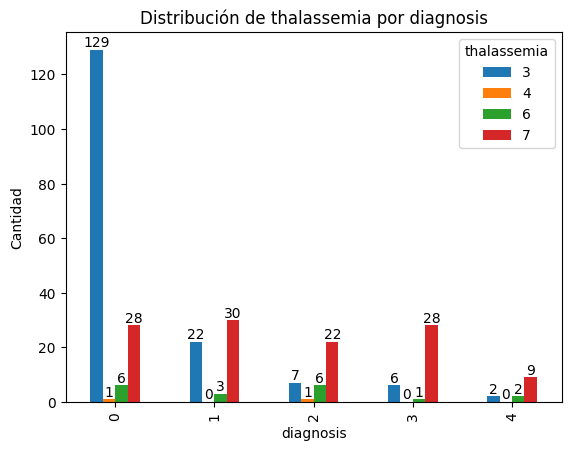

In [58]:
grouped_data = subset.groupby(['diagnosis', 'thalassemia']).size().unstack(fill_value=0)
graph = grouped_data.plot(kind='bar', title='Distribución de thalassemia por diagnosis')

for container in graph.containers:
    graph.bar_label(container, label_type='edge')

plt.xlabel('diagnosis')
plt.ylabel('Cantidad')
plt.show()

In [59]:
mostrar_total_propociones('diagnosis', 'thalassemia')

    Proporción  thalassemia  diagnosis
1     0.777108            3          0
9     0.132530            3          1
5     0.042169            3          2
13    0.036145            3          3
17    0.012048            3          4
3     0.500000            4          0
11    0.000000            4          1
7     0.500000            4          2
15    0.000000            4          3
19    0.000000            4          4
0     0.333333            6          0
8     0.166667            6          1
4     0.333333            6          2
12    0.055556            6          3
16    0.111111            6          4
2     0.239316            7          0
10    0.256410            7          1
6     0.188034            7          2
14    0.239316            7          3
18    0.076923            7          4


El conjunto de datos presenta proporciones que muestran cómo se distribuye la variable thalassemia entre diferentes valores de diagnóstico (diagnosis). Por ejemplo, para el valor de diagnóstico 3, la proporción de thalassemia varía desde 0.781818, indicando que aproximadamente el 78.18% de las observaciones tienen un valor específico de thalassemia, hasta 0.012121, donde solo el 1.21% de las observaciones presentan un valor diferente. De manera similar, para el diagnóstico 4, la proporción de thalassemia alcanza el 50% para algunos valores, sugiriendo una distribución equitativa en estas observaciones. Estas proporciones permiten observar cómo cambia la frecuencia de thalassemia en relación con los diferentes diagnósticos, lo que puede ser útil para identificar patrones en la prevalencia de thalassemia asociada a cada diagnóstico.

### **Max_heart_rate**

Frecuencia cardiaca máxima alcanzada (float).

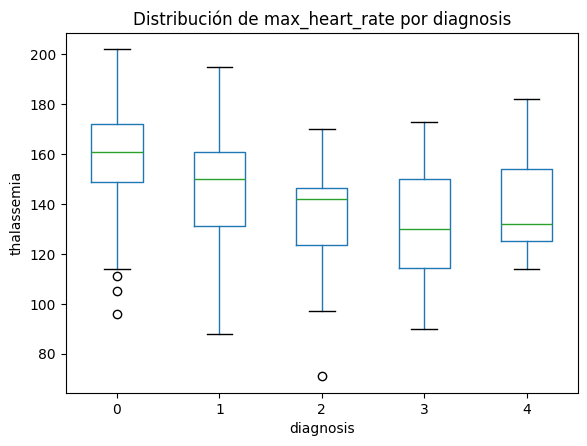

In [60]:
subset.boxplot(column='max_heart_rate', by='diagnosis', grid=False)

plt.title('Distribución de max_heart_rate por diagnosis')
plt.suptitle('')
plt.xlabel('diagnosis')
plt.ylabel('thalassemia')
plt.show()

Haciendo un análisis de los diagramas de caja en cada valor de la gravedad, llegamos a la conclusión de que el valor de la mediana es inversamente proporiconal a la gravedad de la enfermedad cardíaca. Esto indica que, a mayor gravedad de la enfermedad, menor es la frecuencia cardíaca máxima alcanzada.

#### Cholesterol_level

<Axes: xlabel='cholesterol_level'>

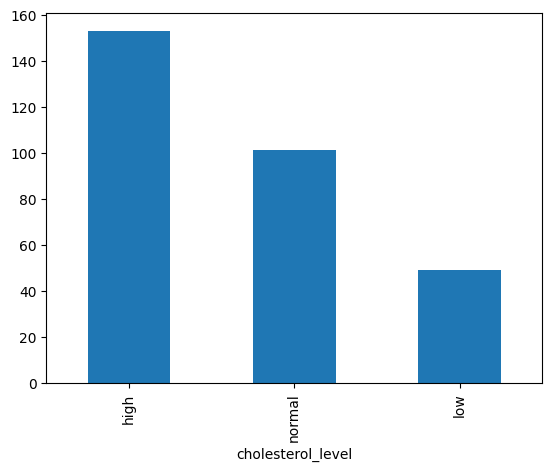

In [61]:
subset.cholesterol_level.value_counts().plot.bar()

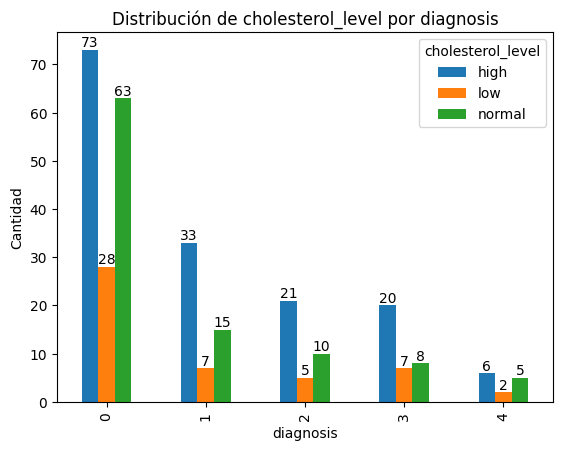

In [62]:
grouped_data = subset.groupby(['diagnosis', 'cholesterol_level']).size().unstack(fill_value=0)
graph = grouped_data.plot(kind='bar', title='Distribución de cholesterol_level por diagnosis')

for container in graph.containers:
    graph.bar_label(container, label_type='edge')

plt.xlabel('diagnosis')
plt.ylabel('Cantidad')
plt.show()

In [63]:
mostrar_total_propociones('diagnosis', 'cholesterol_level')

    Proporción cholesterol_level  diagnosis
1     0.477124              high          0
7     0.215686              high          1
4     0.137255              high          2
10    0.130719              high          3
13    0.039216              high          4
2     0.571429               low          0
8     0.142857               low          1
5     0.102041               low          2
11    0.142857               low          3
14    0.040816               low          4
0     0.623762            normal          0
6     0.148515            normal          1
3     0.099010            normal          2
9     0.079208            normal          3
12    0.049505            normal          4


El análisis de las proporciones de niveles de colesterol según el diagnóstico muestra que los niveles de colesterol normal predominan en los diagnósticos menos graves, mientras que los niveles altos y bajos se distribuyen de manera más variada en diagnósticos más severos. A medida que la severidad del diagnóstico aumenta, las proporciones de colesterol alto y bajo tienden a cambiar, sugiriendo que los niveles de colesterol están relacionados con la severidad de la enfermedad, aunque esta relación no es estrictamente lineal.

#### Blood_pressure_level

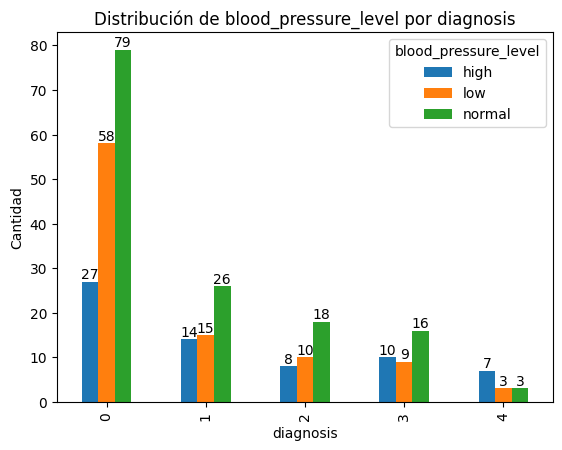

In [64]:
grouped_data = subset.groupby(['diagnosis', 'blood_pressure_level']).size().unstack(fill_value=0)
graph = grouped_data.plot(kind='bar', title='Distribución de blood_pressure_level por diagnosis')

for container in graph.containers:
    graph.bar_label(container, label_type='edge')

plt.xlabel('diagnosis')
plt.ylabel('Cantidad')
plt.show()

In [65]:
mostrar_total_propociones('diagnosis', 'blood_pressure_level')

    Proporción blood_pressure_level  diagnosis
0     0.409091                 high          0
6     0.212121                 high          1
3     0.121212                 high          2
9     0.151515                 high          3
12    0.106061                 high          4
1     0.610526                  low          0
7     0.157895                  low          1
4     0.105263                  low          2
10    0.094737                  low          3
13    0.031579                  low          4
2     0.556338               normal          0
8     0.183099               normal          1
5     0.126761               normal          2
11    0.112676               normal          3
14    0.021127               normal          4


El análisis de la relación muestra que los pacientes con niveles más altos de presión arterial tienden a tener diagnósticos más graves, ya que los valores más altos de blood_pressure_level están asociados con diagnósticos de mayor severidad. Por otro lado, aquellos con niveles de presión arterial más bajos tienden a presentar diagnósticos menos graves. En el caso de los niveles normales de presión arterial, la severidad del diagnóstico varía, pero se observa una mayor proporción de diagnósticos menos graves. Esto sugiere que la presión arterial más alta está correlacionada con una mayor gravedad de la enfermedad cardíaca.

#### Risk_score

Riesgo calculado de la siguiente manera {edad} * {colesterol} / 1000 + {presión arterial en reposo} / 100.

In [66]:
fig = px.box(subset, y='risk_score')
fig.show()

La mediana del risk_score (14.374) se encuentra en un valor intermedio dentro del gráfico de caja, y el rango intercuartílico, que va de 12.068 a 17.202, abarca el 50% de los datos. Esto sugiere que la mayoría de los pacientes presenta un riesgo moderado. Sin embargo, también se observan algunos valores máximos que se alejan significativamente de la mediana, identificados como valores atípicos. Estos valores podrían estar asociados a pacientes con niveles elevados en las variables utilizadas para calcular el **risk_score**, como la edad, el colesterol y la presión arterial en reposo.

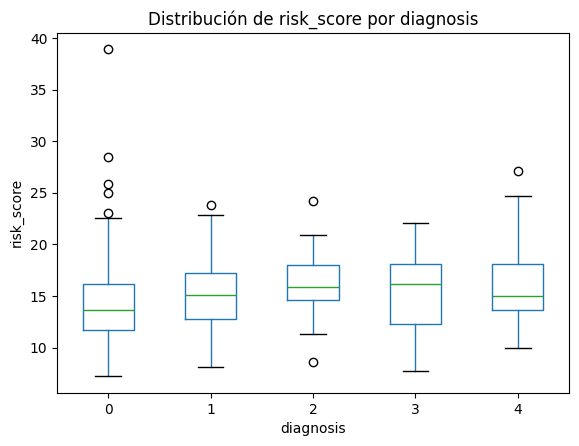

In [67]:
bxp = subset.boxplot(column='risk_score', by='diagnosis', grid=False)

plt.title('Distribución de risk_score por diagnosis')
plt.suptitle('')
plt.xlabel('diagnosis')
plt.ylabel('risk_score')
plt.show()

**Risk_score en relación con Diagnosis**
- **Diagnosis 0:** La mediana del risk_score es la más baja entre todos los grupos de diagnóstico, pero no se observa una diferencia suficientemente marcada que sugiera una clara relación entre un riesgo calculado bajo y la ausencia de enfermedad cardíaca. Además, los valores atípicos significativamente alejados de la mediana muestran que un risk_score alto no necesariamente implica la presencia de enfermedad cardíaca.

- **Diagnosis 1 - 4:** En los casos donde se detecta alguna enfermedad cardíaca (diagnosis 1-4), las medianas de risk_score son similares entre sí, aunque el valor más bajo se encuentra en el grupo de diagnosis = 4, que representa la enfermedad cardíaca más grave. Esto sugiere que, incluso con un risk_score relativamente bajo, es posible que exista una condición cardíaca grave, lo que indica que un bajo risk_score no descarta la gravedad de la enfermedad.

In [68]:
conteo_por_diagnosis = subset.groupby('diagnosis')['risk_factor'].count()
print(conteo_por_diagnosis)

diagnosis
0    164
1     55
2     36
3     35
4     13
Name: risk_factor, dtype: int64


#### Risk_factor

Es el riesgo calculado a partir del 'chest_pain', 'depression_induced_ex' y 'thalassemia'.

In [69]:
fig = px.box(subset, y='risk_factor')
fig.show()

La mediana de 7.2 y el rango intercuartílico que va de 0 a 28.8 indican que la mayoría de los valores del **risk_factor** son relativamente bajos. Esto sugiere que la mayoría de los pacientes evaluados presentan un riesgo calculado reducido. Sin embargo, los valores máximos significativamente más altos en comparación con la mediana revelan la presencia de un grupo de pacientes con un riesgo considerablemente mayor. Esto podría estar relacionado con una combinación de características (como el dolor de pecho, la depresión inducida por ejercicio y la talasemia) que elevan el factor de riesgo en esos casos específicos. 

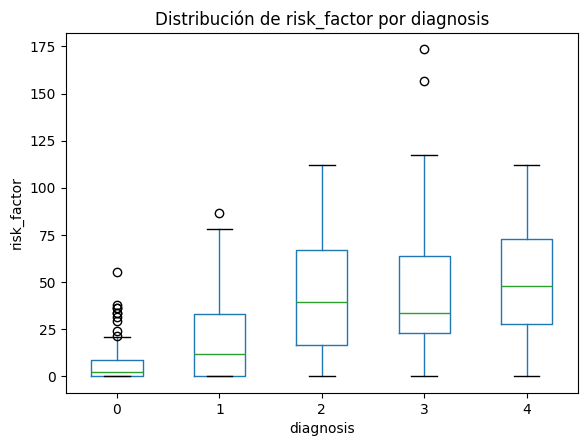

In [70]:
bxp = subset.boxplot(column='risk_factor', by='diagnosis', grid=False)

plt.title('Distribución de risk_factor por diagnosis')
plt.suptitle('')
plt.xlabel('diagnosis')
plt.ylabel('risk_factor')
plt.show()

**Risk_factor en relación a Diagnosis**
- **Diagnosis 0:** Los valores de risk_factor para los casos sin enfermedad cardíaca (diagnosis = 0) son relativamente bajos, con una mediana cercana a 0. Esto sugiere una correlación entre un bajo factor de riesgo y una menor probabilidad de desarrollar enfermedad cardíaca. Sin embargo, es importante tener en cuenta la presencia de valores atípicos, donde el risk_factor es elevado a pesar de no haber indicios de enfermedad cardíaca.

- **Diagnosis 1-4:** A medida que aumenta la gravedad de la enfermedad cardíaca, los valores de risk_factor también incrementan. En los niveles 3 y 4, que representan los diagnósticos más graves, la mediana del risk_factor es notablemente más alta, lo que refuerza la relación entre un mayor riesgo calculado y una mayor gravedad. Además, se observan menos valores atípicos en estos grupos, lo que sugiere una mayor consistencia en el aumento del factor de riesgo en casos más graves.

#### Symptom_severity - Gravedad de los síntomas.

Determinar la urgencia del tratamiento y la extensión de la enfermedad cardíaca, calculado como ('chest_pain' * 'depression_induced_ex')

In [71]:
fig = px.box(subset, y='symptom_severity')
fig.show()

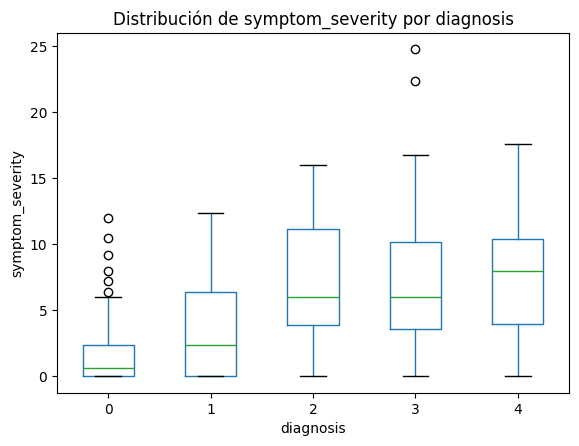

In [72]:
bxp = subset.boxplot(column='symptom_severity', by='diagnosis', grid=False)

plt.title('Distribución de symptom_severity por diagnosis')
plt.suptitle('')
plt.xlabel('diagnosis')
plt.ylabel('symptom_severity')
plt.show()

A simple vista, el gráfico sugiere una tendencia en la que, al aumentar la gravedad de la enfermedad diagnosticada, también se incrementa la severidad de los síntomas. Sin embargo, este patrón no confirma por sí solo que un aumento en la gravedad de los síntomas esté directamente relacionado con una enfermedad cardíaca. 

Asimismo, se observan valores atípicos en el gráfico de caja, principalmente en los casos donde no se detecta enfermedad (diagnosis = 0). Esto podría indicar posibles anomalías o errores en los datos, lo cual sería importante investigar más a fondo para entender si tienen un origen justificable.



### **Mapa de calor - Correlación entre las diferentes variables**

Verificar si existen variables altamente correlacionadas linealmente:

In [73]:
valor_unicos_age_group = subset['age_group'].unique()
vu_chol =  subset['cholesterol_level'].unique()
vu_bp = subset['blood_pressure_level'].unique()

C:\Users\lucas\AppData\Local\Temp\ipykernel_28860\372916479.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\lucas\AppData\Local\Temp\ipykernel_28860\372916479.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\lucas\AppData\Local\Temp\ipykernel_28860\372916479.py:3: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.

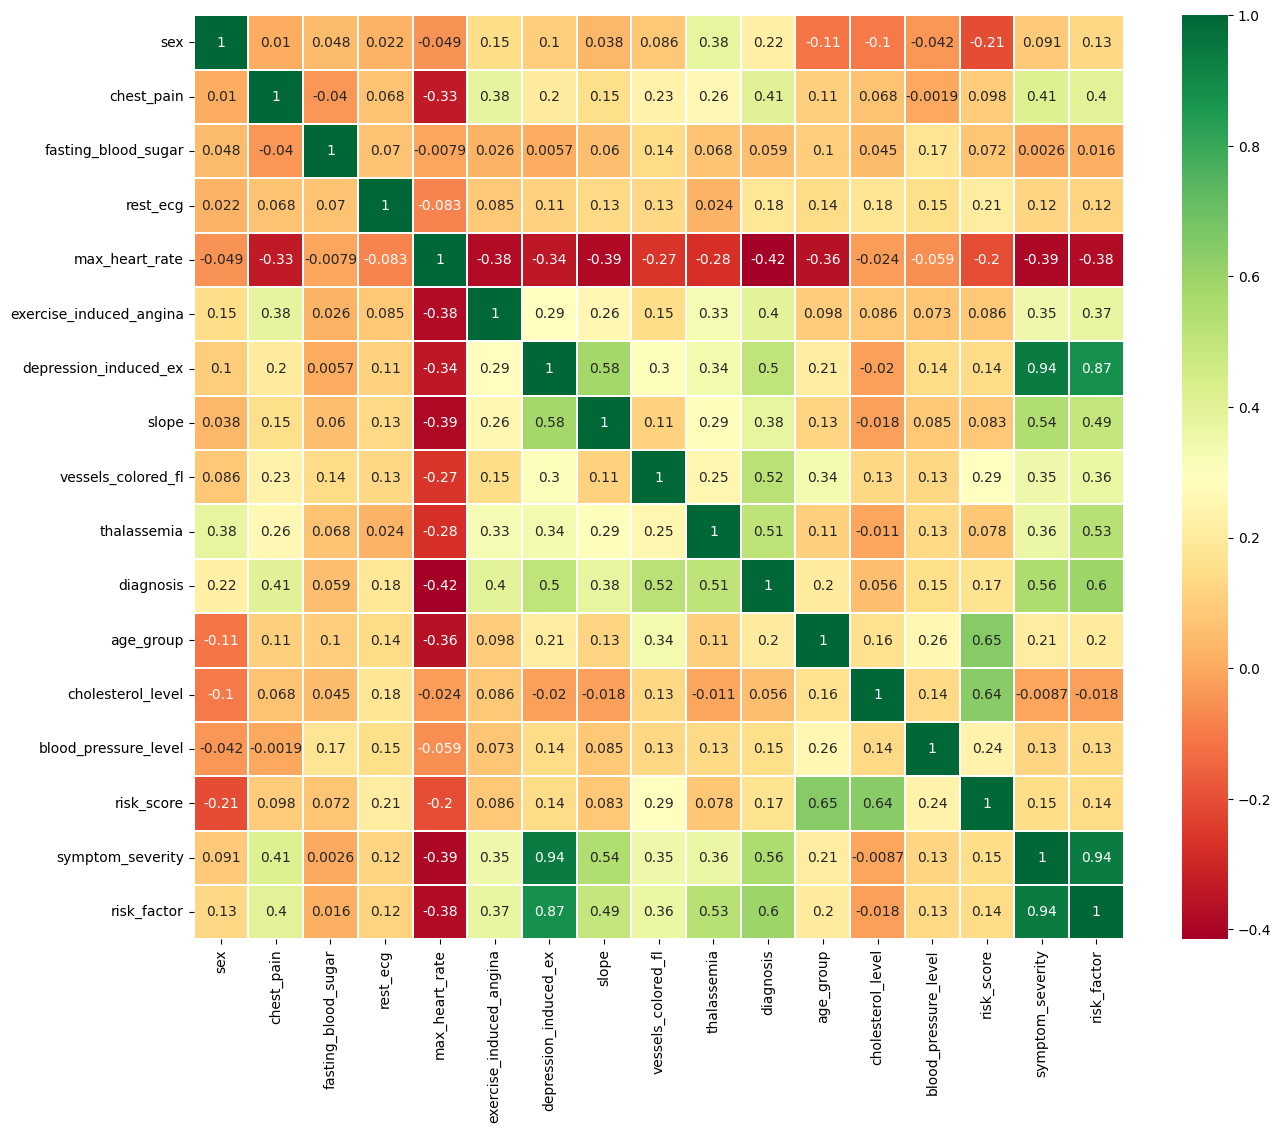

In [74]:
subset["age_group"] = subset.age_group.replace(valor_unicos_age_group, [60, 30, 40, 50, 70])
subset['cholesterol_level'] = subset.cholesterol_level.replace(vu_chol, [1, 2, 0])
subset['blood_pressure_level'] = subset.blood_pressure_level.replace(vu_bp, [2,0,1])
sns.heatmap(subset.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(15, 12)
plt.show()

**Menor relacion con diagnosis**
1. **Max_heart_rate** tiene una baja correlacion con **diagnosis**, que es nuestra variable de salida. Esto nos lleva a entender que max_heart_rate no afecta a la hora de determinar el diagnostico. Además podemos ver que **Max_heart_rate** tiene una baja relación con el resto de variables por lo que nos lleva a pensar de que se pueda eleminar del dataset. 

**Estas son las variables con mayor correlacion con diagnosis**
Consideramos que empieza haber cierta correlacion a partir de 0.40.

1. **chest_pain** 0.4
2. **exercise_induced_angina** 0.44
3. **depression_induced_ex** 0.43
4. **vessel_coloured_fl** 0.46
5. **thalassemia** 0.53
6. **symptom_severity** 0.49
7. **risk_factor** 0.54

**Una vez identificadas estas variables, queremos saber con que otras variables poseen una mayor correlación aparte de diagnosis**
1. **chest_pain**
- risk_factor - 0.42
- symptom_severity - 0.42

2. **exercise_induced_angina**
- risk_factor - 0.41

3. **depression_induced_ex**
- slope - 0.54
- symptom_severity - 0.94
- risk_factor - 0.84

5. **thalassemia**
- risk_factor - 0.54

6. **symptom_severity**
- risk_factor - 0.93
- slope - 0.51
- depression_induced_ex - 0.94
- chest_pain - 0.42

7. **risk_factor**
- symptom_severity - 0.93
- chest_pain - 0.42
- exercise_induced_angina - 0.41
- depression_induced_ex - 0.84
- thalassemia - 0.54

#### Listado de posibles dudas/preguntas al encargado de proveer los datos

1. ¿Que tan fiable son los datos? ¿Qué tan díficil es conseguir registros de pacientes?
2. ¿Por qué hay tantos outliners en risk_score, risk_factor y symptom_severity? ¿Deberíamos borrar los registros, corregirlos o dejarlos como están?
3. ¿Estamos en lo correcto en las decisiones tomadas acerca de quitar ciertas variables de entrada?

## 3- Hipótesis sobre los datos

#### Formulación de hipótesis y comprobación

1. En la variable **chest_pain** debe influir negativamente en el modelo a la hora de predecir si hay o no alguna enfermedad cardiaca dado que las personas asintomáticas se las toma como saludables cuando no lo son.


In [75]:
top_10_chest_pain = subset.nlargest(10, 'chest_pain')

top_10_chest_pain.head(10)

,sex,chest_pain,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,depression_induced_ex,slope,vessels_colored_fl,thalassemia,diagnosis,age_group,cholesterol_level,blood_pressure_level,risk_score,symptom_severity,risk_factor
1,1,4,0,2,108,1,1.5,2,3,3,2,60,2,2,20.762,6.0,18.0
2,1,4,0,2,129,1,2.6,2,2,7,1,60,1,0,16.543,10.4,72.8
6,0,4,0,2,160,0,3.6,3,2,3,3,60,2,1,18.016,14.4,43.2
7,0,4,0,0,163,1,0.6,1,0,3,0,50,2,0,21.378,2.4,7.2
8,1,4,0,2,147,0,1.4,2,1,7,2,60,2,1,17.302,5.6,39.2
9,1,4,1,2,155,1,3.1,3,0,7,1,50,1,1,12.159,12.4,86.8
10,1,4,0,0,148,0,0.4,2,0,6,0,50,0,1,12.344,1.6,9.6
17,1,4,0,0,160,0,1.2,1,0,3,0,50,1,1,14.306,4.8,14.4
24,1,4,0,2,132,1,2.4,2,2,7,4,60,1,1,13.660,9.6,67.2
28,1,4,0,0,171,0,1.5,1,0,3,0,40,2,2,12.121,6.0,18.0


Se puede observar que se cumple con la hipótesis dado que no hay una relación clara entre el chest_pain y la gravedad de la enfermedad, dado que se puede observar variabilidad en la salida de diagnosis.


2. **Max_heart_rate** influirá de manera inversa con la gravedad de la enfermedad, es decir, cuanto menor sea el max_heart_rate, mayor la severidad de la misma.


In [76]:
top_10_max_heart_rate = subset.nlargest(10, 'max_heart_rate')

top_10_max_heart_rate.head(10)

,sex,chest_pain,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,depression_induced_ex,slope,vessels_colored_fl,thalassemia,diagnosis,age_group,cholesterol_level,blood_pressure_level,risk_score,symptom_severity,risk_factor
132,1,2,0,2,202,0,0.0,1,0,3,0,50,1,1,7.216,0.0,0.0
188,1,2,0,2,195,0,0.0,1,1,7,1,50,2,2,17.202,0.0,0.0
186,1,3,1,0,194,0,0.8,3,0,7,0,40,1,0,11.280,2.4,16.8
225,0,2,0,0,192,0,0.7,1,0,3,0,30,1,0,8.320,1.4,4.2
112,1,1,0,2,190,0,0.0,2,0,6,0,50,0,0,10.852,0.0,0.0
53,1,2,0,2,188,0,0.0,1,0,3,0,40,1,1,10.936,0.0,0.0
3,1,3,0,0,187,0,3.5,3,0,3,0,30,2,1,10.550,10.5,31.5
99,1,4,0,2,186,0,0.0,1,0,3,0,40,1,1,11.876,0.0,0.0
133,1,4,0,2,186,1,0.0,1,0,3,0,50,2,1,14.711,0.0,0.0
100,1,4,0,2,185,0,0.0,1,0,3,0,40,2,0,12.850,0.0,0.0


Se cumple con la hipótesis, cuanto mayor es el ritmo cardíaco, no existe o es menor la gravedad de la enfermedad.

3. Es esperable que, para los pacientes de más avanzada edad, se diagnostique algún tipo de gravedad en la enfermedad si los mismos tienen mucha azucar en sangre en ayunas, pocos vasos coloreados por fluroscopia y un alto nivel de presion arterial.

In [77]:
top_10_combined = subset.sort_values(by=['age_group', 'vessels_colored_fl', 'blood_pressure_level'], 
                                     ascending=[False, True, False])
top_10_combined.head(10)

,sex,chest_pain,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,depression_induced_ex,slope,vessels_colored_fl,thalassemia,diagnosis,age_group,cholesterol_level,blood_pressure_level,risk_score,symptom_severity,risk_factor
136,1,4,0,0,125,1,2.6,3,0,7,4,70,0,2,13.630,10.4,72.8
258,1,2,0,2,143,0,0.0,1,0,3,0,70,2,2,18.710,0.0,0.0
257,0,3,0,1,116,0,1.1,2,0,3,0,70,0,1,16.372,3.3,9.9
273,0,4,0,0,125,0,1.6,2,0,3,0,70,0,0,11.699,6.4,19.2
170,1,3,0,0,112,1,2.9,2,1,7,3,70,2,2,20.430,8.7,60.9
103,0,3,1,2,130,0,0.0,1,1,3,0,70,2,0,19.915,0.0,0.0
233,0,2,0,2,121,1,0.2,1,1,3,0,70,2,0,21.106,0.4,1.2
42,0,2,0,0,162,0,0.4,1,2,3,0,70,2,2,23.042,0.8,2.4
155,1,4,0,2,109,0,2.4,2,3,3,1,70,2,1,23.840,9.6,28.8
161,1,4,0,2,162,1,0.0,1,3,3,4,70,2,1,24.658,0.0,0.0


No se cumple completamente con la hipótesis dado que, para los pacientes que cumplen con estas características, no se cumple el enunciado de que tienen mayor gravedad de enfermedad, es más, existen registros de pacientes que ni siquiera la tienen.

## 4- Modelado

Como primera instancia, lo que vamos a hacer es elegir cuál será la métrica de performance que utilicemos para evaluar el modelo.
Las métricas disponibles para elegir son **Accuracy, Precision, ReCall y F1-Score**. Pero, antes de elegir una, tendremos que
evaluar que tan importante es nuestro resultado.

Para eso primero nos haremos unas preguntas:
- ¿Que tan importante es que cuando nosotros digamos A, sea realmente A y no un falso positivo?
- ¿Que tan importante es que cuando nosotros digamos que no es A, realmente sea A y no un falso negativo?
- ¿Que tan costo sería errar en la predición?

Nos interesa más que NO se nos escapen los pacientes que pueden tener la enfermedad, por más de que digamos que la tienen cuando en realidad no es así, es decir, preferimos indicar que hay enfermedad y que se hagan más estudios para descartar todas las posibilidades de que exista.

Por eso, la métrica elegida en primera instancia es: **Recall**. Pero, luego de un análisis más profundo, decidimos que la métrica sea **F1-Score** con el fin de evitar que el modelo underfittee y siempre diga que el paciente está enfermo.

In [78]:
subset_multi = subset.copy() ## Contienen el diagnosis con los valores de 0 a 4

subset['diagnosis'] = subset['diagnosis'].apply(lambda x: 1 if x > 1 else x)


Dividimos el conjunto de datos en dos subconjuntos: subset y subset_multi.

- **subset_multi:** Contiene la variable diagnosis con sus valores originales, los cuales reflejan múltiples categorías de diagnóstico (por ejemplo, 0, 1, 2, 3, 4), lo que permite un enfoque de clasificación multinomial.

- **subset:** En este subconjunto, la variable diagnosis es modificada para que tenga solo dos valores: 0 (indica que no hay enfermedad) y 1 (indica la presencia de enfermedad). Esto convierte el problema en una clasificación binaria.

Después, aplicamos modelos de machine learning a ambos subconjuntos y realizamos una comparación exhaustiva de los resultados obtenidos en cada enfoque. Evaluamos cuál de los dos conjuntos proporciona mejores métricas. Lo esperado por nosotros es que subset de mejores métricas en los modelos más simples como KNN, Logistic Regression, entre otros, mientras que más complejos los modelos, se asemejen las métricas de los subsets. 

#### Dividimos los conjuntos de datos en train, validation y test

In [79]:
train, not_train = train_test_split(subset, test_size=0.4, random_state=42, stratify=subset['diagnosis'])
validation, test = train_test_split(not_train, test_size=0.5, random_state=42, stratify=not_train['diagnosis'])

train_multi, not_train_multi = train_test_split(subset_multi, test_size=0.4, random_state=42, stratify=subset_multi['diagnosis'])
validation_multi, test_multi = train_test_split(not_train_multi, test_size=0.5, random_state=42, stratify=not_train_multi['diagnosis'])

#### Generamos los mappers

In [80]:
mapper_multi = DataFrameMapper([
    (['sex'], [LabelBinarizer()]),
    (['chest_pain'], [StandardScaler()]),
    (['fasting_blood_sugar'], [OneHotEncoder()]),
    (['rest_ecg'], [StandardScaler()]),
    (['max_heart_rate'], [StandardScaler()]),
    (['exercise_induced_angina'], [OneHotEncoder()]),
    (['depression_induced_ex'], [StandardScaler()]),
    (['slope'], [StandardScaler()]),
    (['vessels_colored_fl'], [StandardScaler()]),
    (['thalassemia'], [StandardScaler()]),
    (['age_group'], [OneHotEncoder()]),
    (['cholesterol_level'], [OneHotEncoder()]),
    (['blood_pressure_level'], [OneHotEncoder()]),
    (['risk_score'], [StandardScaler()]),
    (['symptom_severity'], [StandardScaler()]),
    (['risk_factor'], [StandardScaler()])
])

mapper_multi.fit(train_multi)

c:\Users\lucas\Repos\ML-tp\.venv\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function tosequence is deprecated; tosequence was deprecated in 1.5 and will be removed in 1.7



DataFrameMapper(drop_cols=[],
                features=[(['sex'], [LabelBinarizer()]),
                          (['chest_pain'], [StandardScaler()]),
                          (['fasting_blood_sugar'], [OneHotEncoder()]),
                          (['rest_ecg'], [StandardScaler()]),
                          (['max_heart_rate'], [StandardScaler()]),
                          (['exercise_induced_angina'], [OneHotEncoder()]),
                          (['depression_induced_ex'], [StandardScaler()]),
                          (['slope'], [StandardScaler()]),
                          (['vessels_colored_fl'], [StandardScaler()]),
                          (['thalassemia'], [StandardScaler()]),
                          (['age_group'], [OneHotEncoder()]),
                          (['cholesterol_level'], [OneHotEncoder()]),
                          (['blood_pressure_level'], [OneHotEncoder()]),
                          (['risk_score'], [StandardScaler()]),
                          (['symptom_severity'], [StandardScaler()]),
                          (['risk_factor'], [StandardScaler()])])

In [81]:
mapper = DataFrameMapper([
    (['sex'], [LabelBinarizer()]),
    (['chest_pain'], [StandardScaler()]),
    (['fasting_blood_sugar'], [OneHotEncoder()]),
    (['rest_ecg'], [StandardScaler()]),
    (['max_heart_rate'], [StandardScaler()]),
    (['exercise_induced_angina'], [OneHotEncoder()]),
    (['depression_induced_ex'], [StandardScaler()]),
    (['slope'], [StandardScaler()]),
    (['vessels_colored_fl'], [StandardScaler()]),
    (['thalassemia'], [StandardScaler()]),
    (['age_group'], [OneHotEncoder()]),
    (['cholesterol_level'], [OneHotEncoder()]),
    (['blood_pressure_level'], [OneHotEncoder()]),
    (['risk_score'], [StandardScaler()]),
    (['symptom_severity'], [StandardScaler()]),
    (['risk_factor'], [StandardScaler()])
])

mapper.fit(train)

c:\Users\lucas\Repos\ML-tp\.venv\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function tosequence is deprecated; tosequence was deprecated in 1.5 and will be removed in 1.7



DataFrameMapper(drop_cols=[],
                features=[(['sex'], [LabelBinarizer()]),
                          (['chest_pain'], [StandardScaler()]),
                          (['fasting_blood_sugar'], [OneHotEncoder()]),
                          (['rest_ecg'], [StandardScaler()]),
                          (['max_heart_rate'], [StandardScaler()]),
                          (['exercise_induced_angina'], [OneHotEncoder()]),
                          (['depression_induced_ex'], [StandardScaler()]),
                          (['slope'], [StandardScaler()]),
                          (['vessels_colored_fl'], [StandardScaler()]),
                          (['thalassemia'], [StandardScaler()]),
                          (['age_group'], [OneHotEncoder()]),
                          (['cholesterol_level'], [OneHotEncoder()]),
                          (['blood_pressure_level'], [OneHotEncoder()]),
                          (['risk_score'], [StandardScaler()]),
                          (['symptom_severity'], [StandardScaler()]),
                          (['risk_factor'], [StandardScaler()])])

## Transformaciones

In [82]:
transformed_subset = mapper.transform(subset)
transformed_subset_multi = mapper_multi.transform(subset_multi)

Ejemplo de como queda la transformación

In [83]:
mapper.transformed_names_

['sex',
 'chest_pain',
 'fasting_blood_sugar_0',
 'fasting_blood_sugar_1',
 'rest_ecg',
 'max_heart_rate',
 'exercise_induced_angina_0',
 'exercise_induced_angina_1',
 'depression_induced_ex',
 'slope',
 'vessels_colored_fl',
 'thalassemia',
 'age_group_0',
 'age_group_1',
 'age_group_2',
 'age_group_3',
 'age_group_4',
 'cholesterol_level_0',
 'cholesterol_level_1',
 'cholesterol_level_2',
 'blood_pressure_level_0',
 'blood_pressure_level_1',
 'blood_pressure_level_2',
 'risk_score',
 'symptom_severity',
 'risk_factor']

### Generamos el Pipeline
Se van a generar los Pipelines de los 4 modelos elegidos, estos son:
- LogisticRegression
- k-NN
- Árboles de decisión
- Random Forest

In [84]:
def evaluate_model(model, set_names=('train', 'validation'), title=''):
    if title:
        display(title)
        
    final_metrics = {
        'Accuracy': [],
        'Precision': [],
        'Recall': [],
        'F1': [],        
    }
        
    for i, set_name in enumerate(set_names):
        assert set_name in ['train', 'validation', 'test']
        set_data = globals()[set_name] 
    
        y = set_data.diagnosis
        y_pred = model.predict(set_data)
        final_metrics['Accuracy'].append(metrics.accuracy_score(y, y_pred))
        final_metrics['Precision'].append(metrics.precision_score(y, y_pred, average='macro'))
        final_metrics['Recall'].append(metrics.recall_score(y, y_pred, average='macro'))
        final_metrics['F1'].append(metrics.f1_score(y, y_pred, average='macro'))
        
    display(pd.DataFrame(final_metrics, index=set_names))

#### Logistic Regression

Haremos una exploración de hyperparámetros mediante una búsqueda en grilla para determinar que combinación de hyperparámetros es la más
adecuada para este tipo de problemas.

Los hyperparámetros a explorar son:
1. **penalty**:  
   Define el tipo de regularización que se aplicará para evitar el sobreajuste del modelo. Las opciones son:
   - 'l1': Lasso, aplica una regularización L1, lo que puede llevar a coeficientes exactamente cero (selección de características).
   - 'l2': Ridge, aplica una regularización L2, penaliza grandes coeficientes pero no los reduce a cero.
   - 'elasticnet': Combinación de normativas L1 y L2 (solo con solver='saga').

2. **C**:  
   Es el inverso de la fuerza de regularización. Controla cuánto penalizará el modelo los coeficientes grandes.  
   - Valores pequeños de C aumentan la regularización (más simple).
   - Valores grandes de C disminuyen la regularización (más ajuste).  
   - Valores típicos: [0.001, 0.01, 0.1, 1, 10, 100].

3. **solver**:  
   Algoritmo utilizado para optimizar los coeficientes del modelo. Las opciones son:
   - 'liblinear': Eficiente para problemas pequeños o clasificación binaria, utiliza descenso coordinado.
   - 'newton-g'`: Basado en gradiente, adecuado para problemas multiclase.
   - 'lbfgs': Quasi-Newton, rápido y adecuado para problemas multiclase.
   - 'sag': Gradiente estocástico promedio, eficiente para grandes conjuntos de datos.
   - 'saga': Similar a 'sag', pero soporta regularización L1 y problemas grandes.

4. **max_iter**:  
   Número máximo de iteraciones para que el algoritmo alcance la convergencia. Aumentar este valor puede ser útil si el modelo no está convergiendo.  
   - Valores típicos: [100, 200, 300].

In [85]:
LR_clf = LogisticRegression(random_state=42)
LR_params = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.01, 0.1, 1],
    'solver': ['newton-cg', 'liblinear', 'lbfgs', 'sag', 'saga'],
    'max_iter': [100, 300, 500],
}

clf = GridSearchCV(LR_clf, LR_params, refit=True, verbose=1)

pipeLR = Pipeline([
    ('mapper', mapper),
    ('classifier', clf),
])

pipeLR.fit(train, train.diagnosis)

evaluate_model(pipeLR, title='LogisticRegression with best params')

clf.best_score_, clf.best_params_

c:\Users\lucas\Repos\ML-tp\.venv\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function tosequence is deprecated; tosequence was deprecated in 1.5 and will be removed in 1.7



Fitting 5 folds for each of 135 candidates, totalling 675 fits


c:\Users\lucas\Repos\ML-tp\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\lucas\Repos\ML-tp\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\lucas\Repos\ML-tp\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\lucas\Repos\ML-tp\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\lucas\Repos\ML-tp\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\lucas\Repos\ML-tp\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning:

The max_iter was reached which means th

'LogisticRegression with best params'

,Accuracy,Precision,Recall,F1
train,0.823204,0.827435,0.817372,0.819766
validation,0.786885,0.792208,0.792208,0.786885


(0.8337837837837838,
 {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'})

In [86]:
LR_clf_best_params = LogisticRegression(random_state=42)

pipeLR = Pipeline([
    ('mapper', mapper),
    ('classifier', LR_clf_best_params),
])

pipeLR.fit(train, train.diagnosis)

evaluate_model(pipeLR, title='LogisticRegression w/o params')


c:\Users\lucas\Repos\ML-tp\.venv\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function tosequence is deprecated; tosequence was deprecated in 1.5 and will be removed in 1.7



'LogisticRegression w/o params'

,Accuracy,Precision,Recall,F1
train,0.850829,0.857288,0.844726,0.847686
validation,0.819672,0.820430,0.822511,0.819478


In [87]:
LR_clf_multi = LogisticRegression(random_state=42)
LR_params_multi = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.01, 0.1, 1],
    'solver': ['newton-cg', 'liblinear', 'lbfgs', 'sag', 'saga'],
    'max_iter': [100, 300, 500],
}

clf_multi = GridSearchCV(LR_clf_multi, LR_params_multi, refit=True, verbose=1)

pipeLR_multi = Pipeline([
    ('mapper', mapper_multi),
    ('classifier', clf_multi),
])

pipeLR_multi.fit(train_multi, train_multi.diagnosis)

evaluate_model(pipeLR_multi, title='LogisticRegression with best params')

clf_multi.best_score_, clf_multi.best_params_

c:\Users\lucas\Repos\ML-tp\.venv\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function tosequence is deprecated; tosequence was deprecated in 1.5 and will be removed in 1.7



Fitting 5 folds for each of 135 candidates, totalling 675 fits


c:\Users\lucas\Repos\ML-tp\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\lucas\Repos\ML-tp\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\lucas\Repos\ML-tp\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\lucas\Repos\ML-tp\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\lucas\Repos\ML-tp\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\lucas\Repos\ML-tp\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning:

The max_iter was reached which means th

'LogisticRegression with best params'

c:\Users\lucas\Repos\ML-tp\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

c:\Users\lucas\Repos\ML-tp\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



,Accuracy,Precision,Recall,F1
train,0.591160,0.423759,0.277108,0.253934
validation,0.557377,0.446429,0.258929,0.237241


(0.6022522522522523,
 {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'})

In [88]:
LR_clf_best_params_multi = LogisticRegression(random_state=42)

pipeLR_multi = Pipeline([
    ('mapper', mapper_multi),
    ('classifier', LR_clf_best_params_multi),
])

pipeLR_multi.fit(train_multi, train_multi.diagnosis)

evaluate_model(pipeLR_multi, title='LogisticRegression w/o params multi diagnosis')

c:\Users\lucas\Repos\ML-tp\.venv\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function tosequence is deprecated; tosequence was deprecated in 1.5 and will be removed in 1.7



'LogisticRegression w/o params multi diagnosis'

c:\Users\lucas\Repos\ML-tp\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

c:\Users\lucas\Repos\ML-tp\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



,Accuracy,Precision,Recall,F1
train,0.624309,0.340793,0.237989,0.249214
validation,0.540984,0.266667,0.203247,0.209207


#### KNN

In [89]:
knn_clf = KNeighborsClassifier(n_neighbors=1)

knn_params = {
    'n_neighbors': np.linspace(1, 50, 50, dtype=int)
}

clf = GridSearchCV(knn_clf, knn_params, refit=True, verbose=1)

gs_pipe = Pipeline([
    ('mapper', mapper),
    ('classifier', clf),
])

gs_pipe.fit(train, train.diagnosis)

evaluate_model(gs_pipe, title='kNN with best model')

clf.best_score_, clf.best_params_

c:\Users\lucas\Repos\ML-tp\.venv\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function tosequence is deprecated; tosequence was deprecated in 1.5 and will be removed in 1.7



Fitting 5 folds for each of 50 candidates, totalling 250 fits


'kNN with best model'

,Accuracy,Precision,Recall,F1
train,0.823204,0.829577,0.816449,0.819181
validation,0.836066,0.834957,0.834957,0.834957


(0.8283783783783785, {'n_neighbors': 19})

In [90]:
kNN_clf_best_params = KNeighborsClassifier()

pipekNN = Pipeline([
    ('mapper', mapper),
    ('classifier', kNN_clf_best_params),
])

pipekNN.fit(train, train.diagnosis)

evaluate_model(pipekNN, title='kNN w/o params')

c:\Users\lucas\Repos\ML-tp\.venv\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function tosequence is deprecated; tosequence was deprecated in 1.5 and will be removed in 1.7



'kNN w/o params'

,Accuracy,Precision,Recall,F1
train,0.861878,0.864599,0.857696,0.859807
validation,0.852459,0.851293,0.852814,0.851822


In [91]:
knn_clf_multi = KNeighborsClassifier(n_neighbors=1)

knn_params_multi = {
    'n_neighbors': np.linspace(1, 50, 50, dtype=int)
}

clf_multi = GridSearchCV(knn_clf_multi, knn_params_multi, refit=True, verbose=1)

gs_pipe_multi = Pipeline([
    ('mapper', mapper_multi),
    ('classifier', clf_multi),
])

gs_pipe_multi.fit(train_multi, train_multi.diagnosis)

evaluate_model(gs_pipe_multi, title='kNN with best model')

clf_multi.best_score_, clf_multi.best_params_

c:\Users\lucas\Repos\ML-tp\.venv\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function tosequence is deprecated; tosequence was deprecated in 1.5 and will be removed in 1.7



Fitting 5 folds for each of 50 candidates, totalling 250 fits


'kNN with best model'

c:\Users\lucas\Repos\ML-tp\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

c:\Users\lucas\Repos\ML-tp\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



,Accuracy,Precision,Recall,F1
train,0.596685,0.429104,0.281043,0.270054
validation,0.590164,0.540171,0.370851,0.377104


(0.6297297297297297, {'n_neighbors': 16})

In [92]:
kNN_clf_best_params_multi = KNeighborsClassifier()

pipekNN_multi = Pipeline([
    ('mapper', mapper_multi),
    ('classifier', kNN_clf_best_params_multi),
])

pipekNN_multi.fit(train_multi, train_multi.diagnosis)

evaluate_model(pipekNN_multi, title='kNN w/o params multi diagnosis')

c:\Users\lucas\Repos\ML-tp\.venv\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function tosequence is deprecated; tosequence was deprecated in 1.5 and will be removed in 1.7



'kNN w/o params multi diagnosis'

c:\Users\lucas\Repos\ML-tp\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

c:\Users\lucas\Repos\ML-tp\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



,Accuracy,Precision,Recall,F1
train,0.651934,0.33600,0.249299,0.255589
validation,0.590164,0.28875,0.227922,0.249875


#### Árboles de decisión

In [93]:
mapper_tree = DataFrameMapper([
    (['sex'], None),
    (['chest_pain'], None),
    (['fasting_blood_sugar'], None),
    (['rest_ecg'], None),
    (['max_heart_rate'], None),
    (['slope'], None),
    (['depression_induced_ex'], None),
    (['exercise_induced_angina'], None),
    (['vessels_colored_fl'], None),
    (['thalassemia'], None),
    (['age_group'], None),
    (['cholesterol_level'], None),
    (['blood_pressure_level'], None),
    (['risk_score'], None),
    (['symptom_severity'], None),
    (['risk_factor'], None)
])

mapper_tree.fit(train)

DataFrameMapper(drop_cols=[],
                features=[(['sex'], None), (['chest_pain'], None),
                          (['fasting_blood_sugar'], None), (['rest_ecg'], None),
                          (['max_heart_rate'], None), (['slope'], None),
                          (['depression_induced_ex'], None),
                          (['exercise_induced_angina'], None),
                          (['vessels_colored_fl'], None),
                          (['thalassemia'], None), (['age_group'], None),
                          (['cholesterol_level'], None),
                          (['blood_pressure_level'], None),
                          (['risk_score'], None), (['symptom_severity'], None),
                          (['risk_factor'], None)])

In [94]:
mapper_tree_multi = DataFrameMapper([
    (['sex'], None),
    (['chest_pain'], None),
    (['fasting_blood_sugar'], None),
    (['rest_ecg'], None),
    (['max_heart_rate'], None),
    (['slope'], None),
    (['depression_induced_ex'], None),
    (['exercise_induced_angina'], None),
    (['vessels_colored_fl'], None),
    (['thalassemia'], None),
    (['age_group'], None),
    (['cholesterol_level'], None),
    (['blood_pressure_level'], None),
    (['risk_score'], None),
    (['symptom_severity'], None),
    (['risk_factor'], None)
])

mapper_tree_multi.fit(train_multi)

DataFrameMapper(drop_cols=[],
                features=[(['sex'], None), (['chest_pain'], None),
                          (['fasting_blood_sugar'], None), (['rest_ecg'], None),
                          (['max_heart_rate'], None), (['slope'], None),
                          (['depression_induced_ex'], None),
                          (['exercise_induced_angina'], None),
                          (['vessels_colored_fl'], None),
                          (['thalassemia'], None), (['age_group'], None),
                          (['cholesterol_level'], None),
                          (['blood_pressure_level'], None),
                          (['risk_score'], None), (['symptom_severity'], None),
                          (['risk_factor'], None)])

En el caso de los árboles, se decidió no realizarle transformaciones a los datos porque los árboles de decisión son modelos no paramétricos que no asumen una distribución particular de los datos. Pueden manejar tanto variables categóricas como numéricas directamente y no requieren estandarización o normalización, ya que el modelo divide los datos basándose en umbrales, lo que hace que las escalas de las variables no afecten el proceso de decisión.

In [95]:
TM_clf = DecisionTreeClassifier(random_state=42)
TM_params = {
  'max_depth': [2, 5, 10],
  'max_features': [2, 5, 7, None]
}

clf = GridSearchCV(TM_clf, TM_params, refit=True, verbose=1)

TM_pipe = Pipeline([
    ('mapper', mapper_tree),
    ('classifier', clf),
])

TM_pipe.fit(train, train.diagnosis)

evaluate_model(TM_pipe, title='DecisionTreeClassifier with best params')

clf.best_score_, clf.best_params_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


'DecisionTreeClassifier with best params'

,Accuracy,Precision,Recall,F1
train,0.779006,0.778233,0.775633,0.776543
validation,0.786885,0.785560,0.786797,0.785965


(0.7402402402402404, {'max_depth': 2, 'max_features': 7})

In [96]:
TM_clf_multi = DecisionTreeClassifier(random_state=42)
TM_params_multi = {
  'max_depth': [2, 5, 10],
  'max_features': [2, 5, 7, None]
}

clf_multi = GridSearchCV(TM_clf_multi, TM_params_multi, refit=True, verbose=1)

TM_pipe_multi = Pipeline([
    ('mapper', mapper_tree_multi),
    ('classifier', clf_multi),
])

TM_pipe_multi.fit(train_multi, train_multi.diagnosis)

evaluate_model(TM_pipe_multi, title='DecisionTreeClassifier with best params')

clf_multi.best_score_, clf_multi.best_params_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


'DecisionTreeClassifier with best params'

c:\Users\lucas\Repos\ML-tp\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\lucas\Repos\ML-tp\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

c:\Users\lucas\Repos\ML-tp\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\lucas\Repos\ML-tp\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this

,Accuracy,Precision,Recall,F1
train,0.519337,0.175373,0.239796,0.202586
validation,0.524590,0.195122,0.242424,0.216216


(0.601951951951952, {'max_depth': 2, 'max_features': None})

In [97]:
TM_clf = DecisionTreeClassifier(random_state=42)

TM_pipe = Pipeline([
    ('mapper', mapper_tree),
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', TM_clf),
])

TM_pipe.fit(train, train.diagnosis)

evaluate_model(TM_pipe, title='Decision Tree w/o params')

'Decision Tree w/o params'

,Accuracy,Precision,Recall,F1
train,1.000000,1.000000,1.000000,1.000000
validation,0.655738,0.654095,0.654762,0.654251


In [98]:
TM_clf_multi = DecisionTreeClassifier(random_state=42)

TM_pipe_multi = Pipeline([
    ('mapper', mapper_tree_multi),
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', TM_clf_multi),
])

TM_pipe_multi.fit(train_multi, train_multi.diagnosis)

evaluate_model(TM_pipe_multi, title='Decision Tree w/o params multi diagnosis')

'Decision Tree w/o params multi diagnosis'

c:\Users\lucas\Repos\ML-tp\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

c:\Users\lucas\Repos\ML-tp\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



,Accuracy,Precision,Recall,F1
train,0.701657,0.388462,0.269880,0.297631
validation,0.540984,0.317647,0.210823,0.253175


In [99]:
TM_clf = DecisionTreeClassifier(random_state=42, max_depth=3)

TM_pipe = Pipeline([
    ('mapper', mapper_tree),
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', TM_clf),
])

TM_pipe.fit(train, train.diagnosis)

evaluate_model(TM_pipe, title='Decision Tree with max_depth')

'Decision Tree with max_depth'

,Accuracy,Precision,Recall,F1
train,0.856354,0.870581,0.847984,0.852013
validation,0.885246,0.899314,0.877706,0.882077


In [100]:
TM_clf_multi = DecisionTreeClassifier(random_state=42, max_depth=4)

TM_pipe_multi = Pipeline([
    ('mapper', mapper_tree_multi),
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', TM_clf_multi),
])

TM_pipe_multi.fit(train_multi, train_multi.diagnosis)

evaluate_model(TM_pipe_multi, title='Decision Tree with max_depth multi diagnisis')

'Decision Tree with max_depth multi diagnisis'

c:\Users\lucas\Repos\ML-tp\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

c:\Users\lucas\Repos\ML-tp\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



,Accuracy,Precision,Recall,F1
train,0.707182,0.424082,0.344972,0.373737
validation,0.622951,0.394267,0.305465,0.343216


#### Conclusión parcial

Tras ejecutar los diferentes modelos con los subconjuntos subset (clasificación binaria de diagnosis) y subset_multi (clasificación multinomial), se concluye que trabajar con el subset de clasificación binaria, efectivamente, ofrece mejores resultados. Además, al comparar los resultados de modelos con y sin ajuste de parámetros, se observó que ajustar los hiperparámetros no mejora el desempeño, e incluso en algunos casos lo empeora. La única excepción fue en los árboles de decisión, donde al limitar la profundidad del árbol en el caso de clasificación binaria, se obtuvieron resultados superiores.

Hasta ahora el modelo con mayor rendimiento, teniendo en cuenta F1 score, es árbol de decision con el subset binario dando como resultado 0,85 en train y 0.88 en validation.

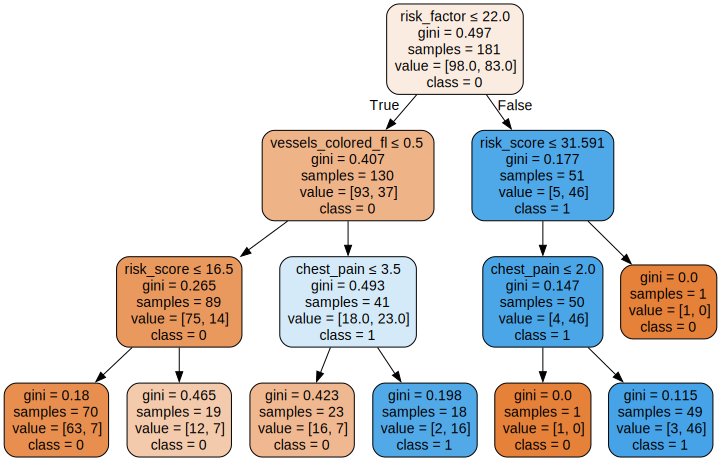

In [101]:
def graph_tree(tree, col_names):
    graph_data = export_graphviz(
        tree, 
        out_file=None, 
        feature_names=col_names,  
        class_names=['0','1'],  
        filled=True, 
        rounded=True,  
        special_characters=True,
    )
    graph = graphviz.Source(graph_data)  
    return graph

graph_tree(TM_clf, mapper_tree.transformed_names_)

Graficando el árbol podemos darnos cuenta cuales son los caminos a la hora de tomar las decisiones. Por ejemplo, fijandonos en la clase 1, si risk_factor es mayor a 22, risk_score menor o igual a 31.591, chest_pain es mayor a 2, el modelo devolverá que esta enfermo.

Con esto nos damos cuenta cuales son las reglas creadas para poder definir si una persona esta enferma o no según este modelo.

Ahora, al ver que el mejor modelo es un árbol de decision, probaremos si con Random Forest el resultado puede llegar a tener una mejoría.

### Random Forest

In [102]:
RF_clf = RandomForestClassifier(random_state=42)
RF_params = [{ 
  'n_estimators': [100, 200], 
  'max_depth': [1 , 2, 3],
  'max_features': [2, 3, 5]
}]

clf = GridSearchCV(RF_clf, RF_params, refit=True, verbose=1)

RF_pipe = Pipeline([
    ('mapper', mapper_tree),
    ('classifier', clf),
])

RF_pipe.fit(train, train.diagnosis)

evaluate_model(RF_pipe, title='RandomForestClassifier with best params')

clf.best_score_, clf.best_params_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


'RandomForestClassifier with best params'

,Accuracy,Precision,Recall,F1
train,0.856354,0.867236,0.848906,0.852569
validation,0.885246,0.899314,0.877706,0.882077


(0.8172672672672674, {'max_depth': 3, 'max_features': 3, 'n_estimators': 100})

In [103]:
RF_clf_multi = RandomForestClassifier(random_state=42)
RF_params_multi = [{ 
  'n_estimators': [100, 200], 
  'max_depth': [1 , 2, 3],
  'max_features': [2, 3, 5]
}]

clf_multi = GridSearchCV(RF_clf_multi, RF_params_multi, refit=True, verbose=1)

RF_pipe_multi = Pipeline([
    ('mapper', mapper_tree_multi),
    ('classifier', clf_multi),
])

RF_pipe_multi.fit(train_multi, train_multi.diagnosis)

evaluate_model(RF_pipe_multi, title='RandomForestClassifier with best params')

clf_multi.best_score_, clf_multi.best_params_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


'RandomForestClassifier with best params'

c:\Users\lucas\Repos\ML-tp\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

c:\Users\lucas\Repos\ML-tp\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\lucas\Repos\ML-tp\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



,Accuracy,Precision,Recall,F1
train,0.558011,0.427007,0.259497,0.229371
validation,0.540984,0.183333,0.250000,0.211538


(0.6129129129129129, {'max_depth': 2, 'max_features': 5, 'n_estimators': 100})

In [104]:
RF_clf = RandomForestClassifier()

RF_pipe = Pipeline([
    ('mapper', mapper_tree),
    ('classifier', RF_clf),
])

RF_pipe.fit(train, train.diagnosis)

evaluate_model(RF_pipe, title='Decision Tree w/o params')

'Decision Tree w/o params'

,Accuracy,Precision,Recall,F1
train,1.000000,1.000000,1.000000,1.000000
validation,0.868852,0.877252,0.862554,0.865934


In [105]:
RF_clf_multi = RandomForestClassifier()

RF_pipe_multi = Pipeline([
    ('mapper', mapper_tree_multi),
    ('classifier', RF_clf),
])

RF_pipe_multi.fit(train_multi, train_multi.diagnosis)

evaluate_model(RF_pipe_multi, title='Decision Tree w/o params')

'Decision Tree w/o params'

c:\Users\lucas\Repos\ML-tp\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

c:\Users\lucas\Repos\ML-tp\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



,Accuracy,Precision,Recall,F1
train,0.723757,0.378182,0.279518,0.302255
validation,0.655738,0.353846,0.253247,0.288037


In [106]:
RF_clf = RandomForestClassifier(random_state=42, max_depth=3)

RF_pipe = Pipeline([
    ('mapper', mapper_tree),
    ('classifier', RF_clf),
])

RF_pipe.fit(train, train.diagnosis)

evaluate_model(RF_pipe, title='Decision Tree with max_depth')

'Decision Tree with max_depth'

,Accuracy,Precision,Recall,F1
train,0.850829,0.862962,0.842882,0.846615
validation,0.868852,0.877252,0.862554,0.865934


In [107]:
RF_clf_multi = RandomForestClassifier(random_state=42, max_depth=8)

RF_pipe_multi = Pipeline([
    ('mapper', mapper_tree_multi),
    ('classifier', RF_clf_multi),
])

RF_pipe_multi.fit(train_multi, train_multi.diagnosis)

evaluate_model(RF_pipe_multi, title='Decision Tree with max_depth')

'Decision Tree with max_depth'

c:\Users\lucas\Repos\ML-tp\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

c:\Users\lucas\Repos\ML-tp\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



,Accuracy,Precision,Recall,F1
train,0.723757,0.378182,0.279518,0.302255
validation,0.704918,0.383333,0.272511,0.306923


En el caso de **Random Forest**, los resultados fueron similares con los obtenidos al trabajar con árboles de decisión. Pero dado la complejidad de entrenamiento y los resultados logrados conviene utilizar árboles de decisión.

### Conclusión

Después de evaluar todos los modelos seleccionados, se concluyó que el mejor rendimiento se obtuvo utilizando **árbol de decesión**, logrando un valor de F1 de 0.85 en train. Esto indica que este modelo, con los parámetros optimizados y aplicado a la clasificación binaria, superó a las demás técnicas evaluadas en términos de equilibrio entre precisión y sensibilidad.

### FEATURE ENGINEERING

Vamos a probar generar una nueva variable a nuestro dataset para ver como influye en la predicción de los datos. 

Viendo el Hotmap realizado anteriormente, se observa que la depresión inducida por el ejercicio está correlacionada con la gravedad de la enfermedad cardíaca. Por ello, al elevar esta variable al cuadrado, le asignamos un mayor peso a aquellos registros con niveles más altos de depresión inducida, penalizando más a los casos con mayor severidad en este factor y destacando su relevancia en la progresión de la enfermedad.

In [108]:
subset_feature_engineering = subset

subset_feature_engineering['depression_induced_ex_squared'] = subset_feature_engineering['depression_induced_ex'] ** 2

In [109]:
X = subset_feature_engineering.drop(columns=['diagnosis'])
y = subset_feature_engineering['diagnosis']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [110]:
TM_clf = DecisionTreeClassifier(random_state=42)

TM_params = {
  'max_depth': [2, 5, 8, 10, 12],
  'max_features': [2, 5, 7, 10, 12, 15, 17, None]
}

clf = GridSearchCV(TM_clf, TM_params, refit=True, verbose=1)

TM_pipe = Pipeline([
    ('mapper', mapper_tree),
    ('classifier', clf),
])

TM_pipe.fit(X_train, y_train)
evaluate_model(TM_pipe, title='Árbol de decisión FE')
clf.best_score_, clf.best_params_

Fitting 5 folds for each of 40 candidates, totalling 200 fits


'Árbol de decisión FE'

,Accuracy,Precision,Recall,F1
train,0.883978,0.883126,0.885481,0.883623
validation,0.852459,0.853226,0.855519,0.852300


(0.806006006006006, {'max_depth': 8, 'max_features': 15})

In [111]:
TM_clf_2 = DecisionTreeClassifier(random_state=42, max_depth=8)
TM_pipe_2 = Pipeline([
    ('mapper', mapper_tree),
    ('classifier', TM_clf_2),
])

TM_pipe_2.fit(X_train, y_train)
evaluate_model(TM_pipe_2, title='Árbol de decisión FE')

'Árbol de decisión FE'

,Accuracy,Precision,Recall,F1
train,0.917127,0.916913,0.916093,0.916474
validation,0.852459,0.852397,0.850108,0.851018


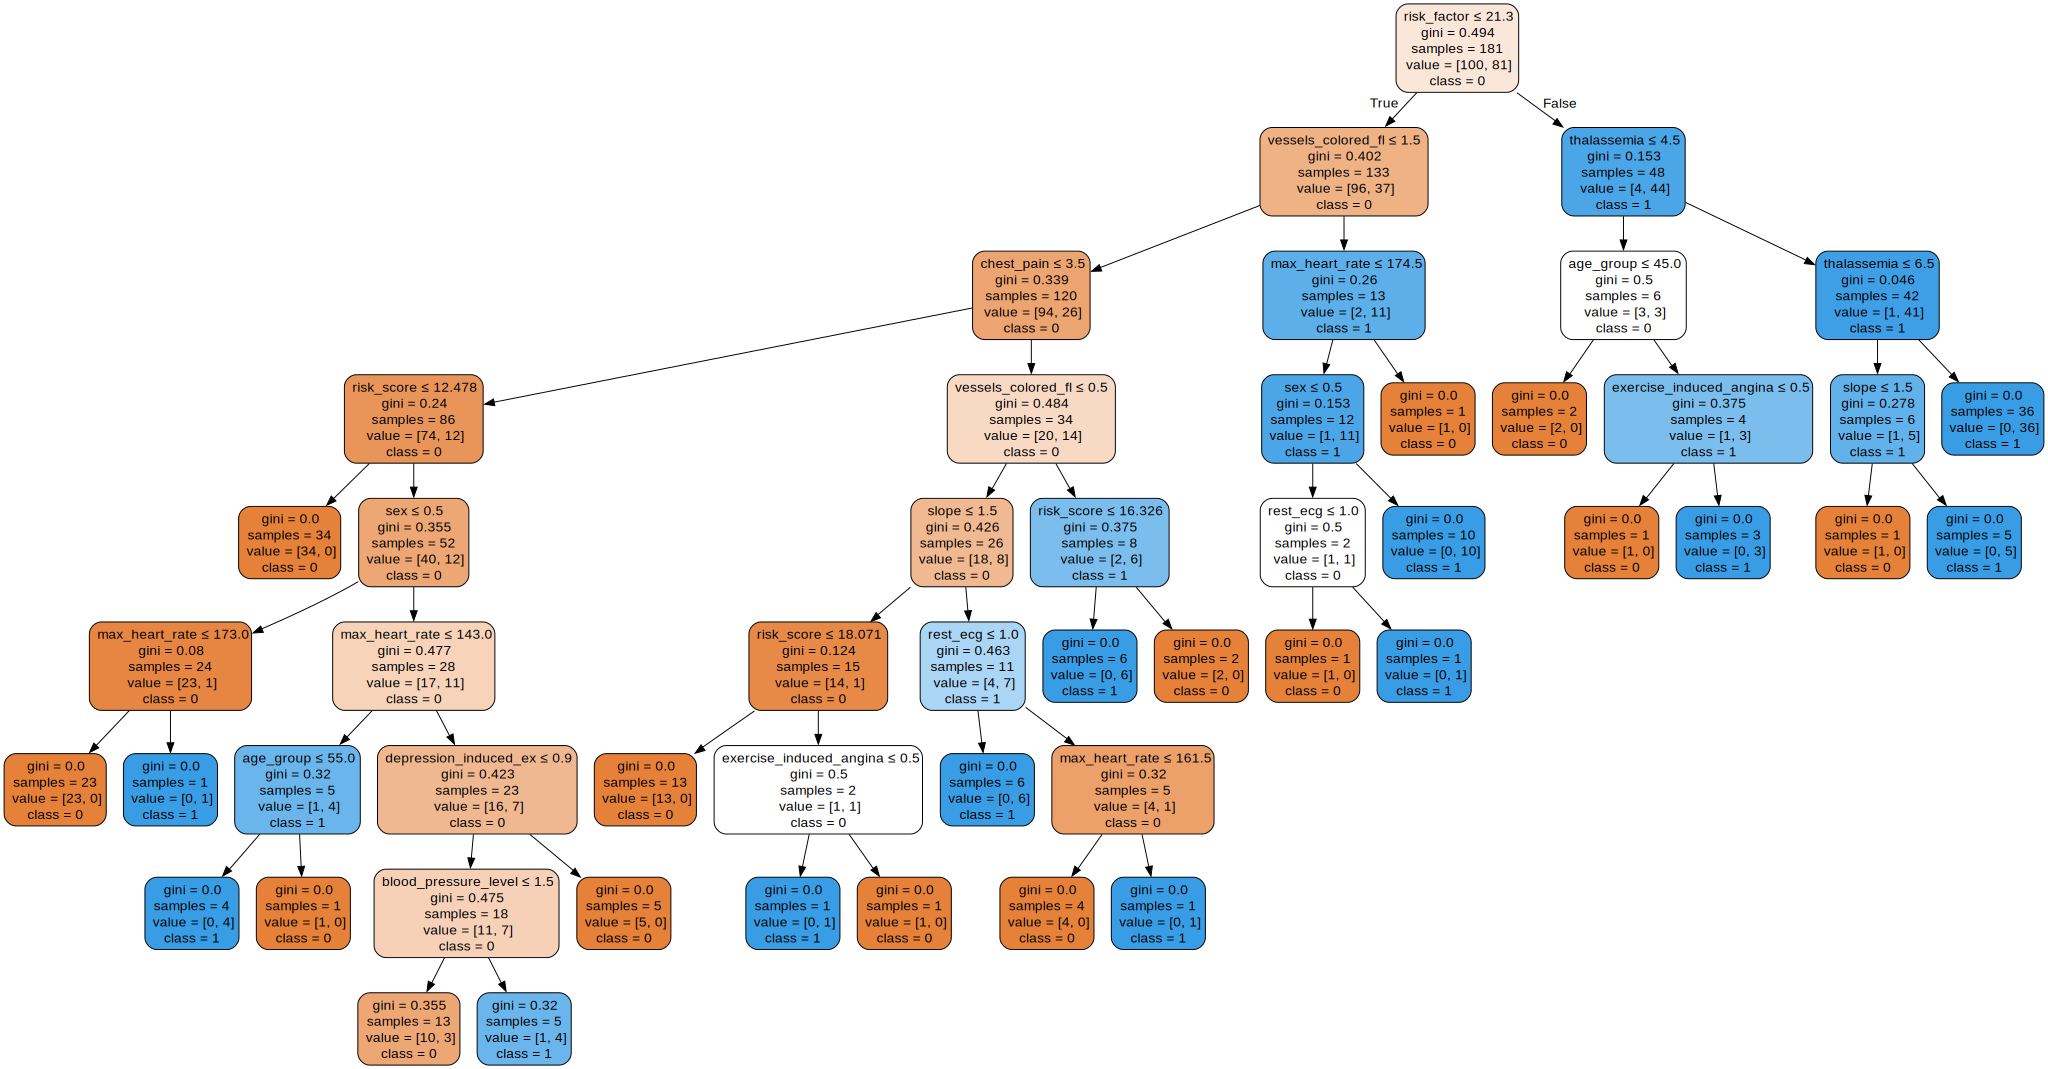

In [112]:
graph_tree(TM_clf_2, mapper_tree.transformed_names_)

#### Conclusión final

En este caso, aplicamos técnicas de **feature engineering** al modelo de **árbol de decisión**, llegamos a la conclusión que es el mejor modelo con valores de 0.91 en train y 0.85 en validation, siempre trabajando con el subset de clasificación binaria dado que es el que mejor resultados dio.

## Resultado final

In [113]:
predict = TM_pipe_2.predict(test)
print(metrics.classification_report(predict, test.diagnosis))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90        36
           1       0.82      0.92      0.87        25

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61



El modelo presenta un buen desempeño en términos de **F1-score**, logrando 0.90 para la clase "sin enfermedad" y 0.87 para la clase "con enfermedad". Esto refleja un equilibrio sólido entre precisión y recall, tanto en la detección de pacientes que no presentan enfermedad como en aquellos que sí la tienen. El **F1 macro promedio** es 0.88, lo que sugiere un rendimiento equilibrado en ambas clases, mientras que el **F1 ponderado** de 0.89 muestra que el modelo maneja bien el desequilibrio en el número de ejemplos entre las dos clases. En general, el modelo es eficaz en la clasificación de ambos grupos.

Es fácil interpretar por qué el modelo decide si un paciente está enfermo o no, gracias a su estructura jerárquica que muestra claramente los criterios utilizados en cada nodo. Además, los **tiempos de entrenamiento** son considerablemente bajos debido a la cantidad limitada de datos, con un promedio de solo **2 segundos** para completar el entrenamiento. Esto demuestra la eficiencia del modelo tanto en términos de interpretabilidad como de rendimiento computacional.

Para visualizar de manera más clara el desempeño del modelo, generaremos algunos gráficos representativos que muestren su comportamiento con los datos de entrenamiento, validación y prueba. Estos gráficos incluirán un diagrama de dispersión y una matriz de confusión, permitiendo así una interpretación más intuitiva de los resultados.

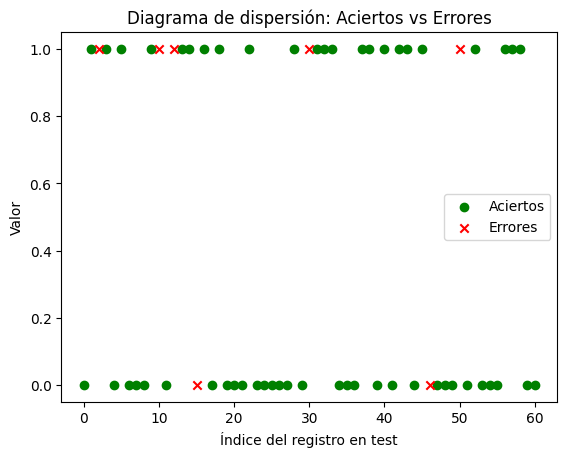

In [141]:
y_true = test.diagnosis
y_pred = predict

aciertos = [i for i in range(len(y_true)) if y_true.iloc[i] == y_pred[i]]
errores = [i for i in range(len(y_true)) if y_true.iloc[i] != y_pred[i]]

plt.scatter([i for i in aciertos], [y_true.iloc[i] for i in aciertos], color='g', label='Aciertos', marker='o')
plt.scatter([i for i in errores], [y_true.iloc[i] for i in errores], color='r', label='Errores', marker='x')

plt.title('Diagrama de dispersión: Aciertos vs Errores')
plt.xlabel('Índice del registro en test')
plt.ylabel('Valor')
plt.legend()

plt.show()

En el gráfico es un diagrama de dispersión que compara los aciertos y errores de un modelo de clasificación. En el eje X se encuentran los índices de las observaciones y en el eje Y, las clases predichas, donde 1.0 representa la clase "enfermo" y 0.0 la clase "no enfermo". Los puntos verdes indican las predicciones correctas (aciertos), mientras que las cruces rojas muestran los errores de clasificación. El modelo parece tener un buen desempeño, con una mayor cantidad de aciertos que de errores, pero presenta algunos errores, 7 mas precisamente, lo que sugiere la existencia de tanto falsos positivos como falsos negativos. Los errores están distribuidos de manera uniforme entre los índices, sin concentrarse en un rango específico.

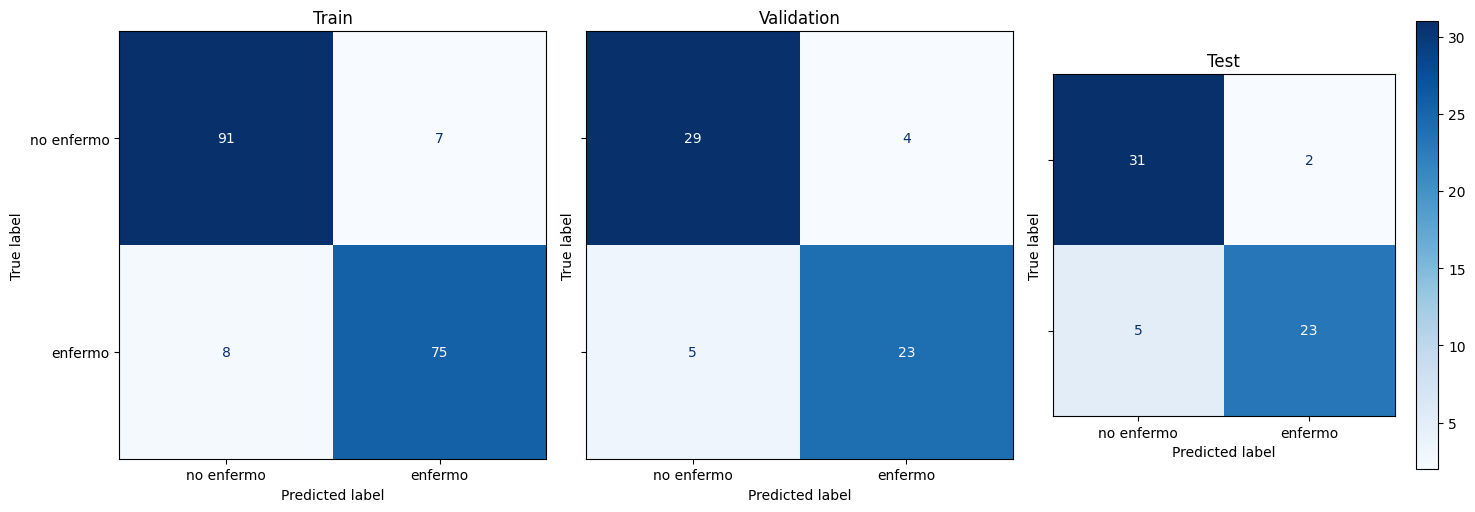

In [143]:
predict_train = TM_pipe_2.predict(train)
predict_validation = TM_pipe_2.predict(validation)
predict_test = predict

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

cm_train = metrics.confusion_matrix(train.diagnosis, predict_train)
cm_plot_train = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['no enfermo', 'enfermo'])
cm_plot_train.plot(cmap="Blues", ax=axes[0], colorbar=False)
cm_plot_train.ax_.set_title('Train')

cm_validation = metrics.confusion_matrix(validation.diagnosis, predict_validation)
cm_plot_validation = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_validation, display_labels=['no enfermo', 'enfermo'])
cm_plot_validation.plot(cmap="Blues", ax=axes[1], colorbar=False)
cm_plot_validation.ax_.set_title('Validation')

cm_test = metrics.confusion_matrix(test.diagnosis, predict_test)
cm_plot_test = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['no enfermo', 'enfermo'])
cm_plot_test.plot(cmap="Blues", ax=axes[2])
cm_plot_test.ax_.set_title('Test')

plt.tight_layout()
plt.show()

El conjunto de matrices de confusión muestra el rendimiento del modelo en los datos de entrenamiento, validación y prueba. En el conjunto de entrenamiento, el modelo muestra un alto rendimiento, con 91 clasificaciones correctas de "no enfermo" y 75 de "enfermo", aunque con algunos errores (7 falsos positivos y 8 falsos negativos). En el conjunto de validación, el rendimiento sigue siendo sólido, con 29 aciertos en "no enfermo" y 23 en "enfermo", pero se observan 4 falsos positivos y 5 falsos negativos. En el conjunto de prueba, el modelo también mantiene un buen desempeño, con 31 aciertos en "no enfermo" y 23 en "enfermo", con 2 falsos positivos y 5 falsos negativos. En general, el modelo funciona bien en los tres subconjuntos.